In [1]:
import numpy as np
from scipy.stats import chi2
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy as sp
from scipy.stats import binom
from plotly import graph_objects as go



# The data from the article:

In [2]:
table2 = np.array([
    [841,  115,   113,   54,    1,     7],  # Ramaley 1913
    [6917, 308,   411,   53,    18,    7],  # Chamberlain 1928
    [1842, 151,   140,   34,    5,     6],  # Rife 1940
    [140,  34,    33,    20,    8,     2],  # Merrell 1975
    [6206, 669,   471,   125,   5,     1],  # Annett 1973
    [154,  11,    31,    9,     0,     0],  # Ferronato et al. 1947
    [232,  17,    41,    7,     3,     1],  # Mascie-Taylor (unpub, in McManus 1985)
    [1060, 144,   122,   46,    3,     4],  # Chaurasia & Groswani (unpub, in McManus 1985)
    [1656, 130,   170,   40,    4,     0],  # Annett 1978
    [303,  37,    45,    15,    0,     0],  # Carter-Saltzmann 1980
    [315,  68,    57,    16,    0,     0],  # Coren & Porac 1980
    [848,  211,   325,   150,   30,   22],  # McGee & Cozad 1980
    # [1729, 173,   281,   63,    8,     3] # Leiber & Axelrod 1981
])
table2_names = [
    "Ramaley 1913","Chamberlain 1928","Rife 1940", "Merrell 1975", "Annett 1973", "Ferronato et al. 1974", "Mascie-Taylor (unpub)" , "Chaurasia & Groswani(unpub)", "Annett 1978", "Carter-Saltzmann 1980", "Coren & Porac 1980", "McGee & Cozad 1980"]

table3 = np.array([
[  58,   9,  np.nan,  np.nan,  np.nan,  np.nan,  14,   5,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,  np.nan,  np.nan,  np.nan,  np.nan],
[  211,  57, 3,       np.nan,  np.nan,  np.nan,  35,  16,   5,       np.nan,  np.nan,  np.nan,   0, 0,   1,      np.nan,  np.nan,  np.nan],
[  123,  63, 6,       0,       np.nan,  np.nan,  22,  24,   6,       1,       np.nan,  np.nan,   2, 1,   1,      0,       np.nan,  np.nan],
[  70,   39, 6,       1,       0,       np.nan,   8,   8,   7,       1,       0,       np.nan,   0, 0,   1,      0,       0,       np.nan],
[  9,    12, 6,       2,       0,       0,        1,   0,   0,       1,       0,       0,        1, 0,   0,      0,       0,            0],
[  134,  15, np.nan,  np.nan,  np.nan,  np.nan,  17,   9,   np.nan,  np.nan,  np.nan,  np.nan,   1, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  91,   22, 2,       np.nan,  np.nan,  np.nan,  19,   3,   3,       np.nan,  np.nan,  np.nan,   0, 0,   0,      np.nan,  np.nan,  np.nan],
[  22,   7,  0,       2,       np.nan,  np.nan,   6,  11,   3,       0,       np.nan,  np.nan,   0, 0,   0,      0,       np.nan,  np.nan],
[  10,   5,  0,       0,       0,       np.nan,   3,   1,   0,       0,       0,       np.nan,   1, 0,   0,      0,       0,       np.nan],
[  4,    0,  0,       0,       0,       0,        0,   0,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0],
[  74,   4,  np.nan,  np.nan,  np.nan,  np.nan,   6,   2,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  107,  18, 3,       np.nan,  np.nan,  np.nan,  11,   3,   0,       np.nan,  np.nan,  np.nan,   2, 0,   0,      np.nan,  np.nan,  np.nan],
[  81,   16, 4,       0,       np.nan,  np.nan,  16,   1,   0,       2,       np.nan,  np.nan,   0, 0,   0,      0,       np.nan,  np.nan],
[  31,   10, 1,       0,       0,       np.nan,   0,   0,   0,       2,       0,       np.nan,   0, 0,   0,      0,       0,       np.nan],
[  19,   7,  1,       1,       0,       0,        3,   2,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0],
[  86,   4,  np.nan,  np.nan,  np.nan,  np.nan,   8,   1,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  100,  27, 0,       np.nan,  np.nan,  np.nan,   7,   5,   0,       np.nan,  np.nan,  np.nan,   0, 1,   0,      np.nan,  np.nan,  np.nan],
[  65,  11,  2,       0,       np.nan,  np.nan,   4,   3,   2,       0,       np.nan,  np.nan,   0, 1,   0,      0,       np.nan,  np.nan],
[  39,  11,  2,       0,       0,       np.nan,   2,   1,   0,       0,       0,       np.nan,   0, 0,   0,      0,       0,       np.nan],
[  13,   9,  1,       0,       0,       0,        0,   1,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0]
]) 

table3_names = ["ICM1(propositi)", "ICM2(propositi)", "ICM2(maternal family)", "ICM2 paternal family"]
table5_mono = np.array([
    [56,  13,   1], # Wilson & Jones (1932)
    [35,  6,    1], # Stocks (1933)
    [34,  13,   3], # Newman et al. (1937)
    [80,  38,   4], # Bouterwek (1938)
    [176, 41,   6], # Rife (1940)
    [72,  24,   7], # Thyss (1946)
    [261, 76,   6], # Rife (1950)
    [19,  12,   2], # Dechaume (1957)
    [199, 51,   9], # Zazzo (1960)
    [132, 46,   9], # Carter-Saltzmann et al. (1976)
    [380, 123, 11], # Loehlin & Nichols (1976)
    [53,  19,   3], # Springer & Searleman (1978)
    [32,   9,   2]  # NCDS (unpublished)
])
table5_di = np.array([
    [97,  24,   2], # Wilson & Jones (1932)
    [76,  16,   2], # Stocks (1933)
    [39,  11,   0], # Newman et al. (1937)
    [23,  12,   0], # Bouterwek (1938)
    [104, 39,   3], # Rife (1940)
    [60,  24,   2], # Thyss (1946)
    [164, 45,   2], # Rife (1950)
    [21,  11,   1], # Dechaume (1957)
    [264, 69,   2], # Zazzo (1960)
    [115, 54,   7], # Carter-Saltzmann et al. (1976)
    [261, 70,   2], # Loehlin & Nichols (1976)
    [35,  9,    3], # Springer & Searleman (1978)
    [66,  18,   4]  # NCDS (unpublished)
])

table5_names = ["Wilson & Jones (1932)", "Stocks (1933)", "Newman et al. (1937)", "Bouterwek (1938)", "Rife (1940)", "Thyss (1946)", "Rife (1950)", "Dechaume (1957)", "Zazzo (1960)", "Carter-Saltzmann et al. (1976)",
 "Loehlin & Nichols (1976)",
 "Springer & Searleman (1978)", "NCDS (unpublished)"]

For each dataset the value of $p(L_m)$ (manifest proportion of left-handers in a particular population) can be estimated from the data:

For family data we need to measure:
1. $p(L_m)$ of progeny generation
2. $p(L_m)$ of parents generation

$$p(L_m)_{progeny} = \frac{Left\_handers}{participants}$$

$$p(L_M)_{parental} = \frac{2\bullet(L\times L) + R\times L}{2\bullet participants}$$

In [3]:
def calc_measured_fam(data):
    """
    Estimate the probability p(L_m) for progeny and parents based on the given dataset.
    :param data: dataset to estimate p(L_m) from.
    :return: A tuple containing two probabilities:
             - p(L_m) for progeny (the manifest proportion of left-handers in the progeny generation).
             - p(L_m) for parents (the manifest proportion of left-handers in the parents generation).
    :rtype: tuple[float, float]
    """
    l_child = 0
    child_cnt = 0

    l_par = 0
    par_count = 0

    cols = len(data[0])/3
    
    for size,row in enumerate(data):

        child_cnt += np.nansum(row) * (1+ size)
        par_count += np.nansum(row) * 2
    
        for col, cell in enumerate(row):
            count = np.nansum(cell)
            
            l_par += count * (col//cols)
            
            l_child += count * (col % cols)  
    return l_child/child_cnt, l_par/par_count
table2_mes = np.array([calc_measured_fam([row]) for row in table2])
table3_mes = np.array([calc_measured_fam(table3[i*5:5*(1+i)]) for i in range(4)])

For twins there is no data about the parents, thus we calculate only $p(L_m)$ of progeny generation

In [4]:
def calc_measured_twin(data):
    """
    Estimate the probability p(L_m) for progeny based on the given dataset.
    :param data: The dataset used for estimating p(L_m).Should be a 2D array-like structure.
    :type data: ArrayLike
    :return: The estimate of p(L_m) for the twins' dataset.
    """
    cnt = np.nansum(data) *2
    l = data[1] + 2 * data[2]
    return l/cnt

table5_mono_mes = np.array([calc_measured_twin(row) for row in table5_mono])
table5_di_mes =  np.array([calc_measured_twin(row) for row in table5_di])

In [5]:
measured_tables = [table2_mes, table3_mes, table5_mono_mes, table5_di_mes]

## probabilities:


### general:

probabilities for each genotype given parents genotye (mandelian genetics):

In [6]:
#                  DD           DC                 CC
gene_probs = np.array([
                [[1,0,0],      [0.5,0.5,0],      [0,1,0]],     #DD
                [[0.5,0.5,0],  [0.25,0.5,0.25],  [0,0.5,0.5]], #DC
                [[0,1,0],      [0,0.5,0.5],      [0,0,1]]])    #CC


probabilities for manifesting each phenotype given the genotype:

![alt text](p(phen,gen).png)

$p(L_t) = p(CC)\bullet p(L|CC) + p(DC)\bullet p(L|DC)=$


$0.5p(C)^2 + 2(C-C^2)\times p(L|DC) =(0.5-p(L|DC))\bullet p(C)^2 +p(L|DC)\bullet p(C)$

hence:

$p(C)=\frac{-2p(L│DC)±2\sqrt{p(L│DC)^2+(0.5-2p(L│DC))p(L_t ) }}{2p(L│DC)-0.5}$


In [7]:
def calc_c(pl, pldc):
    """
    Calculate the incidence of allele C based on the given parameters.

    :param pl: p(L_t) - The true incidence of left-handedness.
    :type pl: float
    :param pldc: p(L|DC) - The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :return: p(C) - The incidence of allele C.
    """
    if pldc == 0.25:
        return 2*pl
    
    return (-2 * pldc + 2 * np.sqrt(pldc **2 +(0.5 - 2*pldc)*pl))/(2*(0.5 -2*pldc))

the probability of having genotype G fiven the presented phenotype H

$p(G|H)= \frac{p(G) \bullet p(H|G)}{p(H)} $

In [8]:
def p_gen_phen(C, pl, pldc, gen, H):
    """
    Calculate the conditional probability of having the genotype given the phenotype.

    :param C: p(C) - The incidence of allele C.
    :type C: float
    :param pl: p(L_t) - The true incidence of left-handedness.
    :type pl: float
    :param pldc: p(L|DC) - The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :param gen: The genotype: 0=DD, 1=DC, 2=CC.
    :type gen: int
    :param H: The phenotype: 0=right-handed, 1=left-handed.
    :type H: int
    :return: p(G|H) - The conditional probability of having the genotype given the phenotype.
    :rtype: float
    """

    if gen == 0:
        if H == 0:
            return (1-C)**2/(1-pl)
        return 0
        
    if gen == 2:
        if H == 0:
            return C**2       * 0.5     /(1-pl)
        return C**2       * 0.5     /pl

    if gen == 1:
        if H == 0:
            return 2*(C-C**2) * (1-pldc)/(1-pl)

        return 2*(C-C**2) * pldc / pl

### family data

The probability of progeny presenting left handedness given his parents genotypes G1, G2 may be calculated using Mendel's laws of heredity:

$p(L|G_1\times G_2) = \sum_{G \in \{DD, DC, CC\}} p(L|G) \cdot p(G|G_1\times G_2)$

In [9]:
def p_left(pldc,g1,g2):
    pl_gen = np.array([0,pldc,0.5])
    return np.sum(pl_gen * gene_probs[g1,g2])

through the application of the binomial distribution, we can derive the probabilities of n progenies within a family of N exhibiting left- handedness:

In [10]:
def fam_prob(pldc,g1,g2, size):
    pl_fam = p_left(pldc,g1,g2)
    return np.array([binom.pmf(i, size, pl_fam) for i in range(size+1)])

Thus, given the phenotypes of two parents, the probability of them having n out of N offspring who manifest left-handedness is calculated by:
$p(n|H_1\times H_2) = \sum_{G_1 \in \{DD, DC, CC\}} \sum_{G_2 \in \{DD, DC, CC\}} p(G_1|H_1) p(G_2|H_2) p_N(n|G_1\times G_2)
$

In [11]:
def family_probs(C,pl, pldc, size):
    """
    Calculate the list of binomial probabilities for a given family size and parameters.

    :param C: p(C) - The incidence of allele C.
    :type C: float
    :param pl: p(L_t) - The true incidence of left-handedness.
    :type pl: float
    :param pldc: p(L|DC) - The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :param size: The family size.
    :type size: int
    :return: An array of binomial probabilities where n = family size and success = number of left-handed children.
    :rtype: numpy.ndarray
    """
    probs = np.zeros(size*3+3)
    for g1 in range(3):
        for g2 in range(3):
            fam_gene_prob = fam_prob(pldc,g1,g2,size)
            probs[:size+1] +=  fam_gene_prob * p_gen_phen(C,pl,pldc,g1,0)* p_gen_phen(C,pl,pldc,g2,0)
            probs[1+size:2*size+2] += fam_gene_prob * p_gen_phen(C,pl,pldc,g1,0)* p_gen_phen(C,pl,pldc,g2,1)
            probs[-size-1:] += fam_gene_prob * p_gen_phen(C,pl,pldc,g1,1)* p_gen_phen(C,pl,pldc,g2,1)
    return probs

### twins

probs for MZ twins, Consider parents of genotypes:

$p(H_1\&H_2|G_{parent1} \times G_{parent2})=\Sigma\Sigma p(G|G_{parent1} \times G_{parent2})p(H_1|G)p(H_2|G)$

In [12]:
def mono_twins_phen_parental_gen(pldc, pl, phen1, phen2, gen1, gen2):
    """
    Calculate the probability of having MZ twins based on parents' genotype.

    :param pldc: p(L|DC) - The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :param pl: p(L_t) - The true incidence of left-handedness.
    :type pl: float
    :param phen1: Phenotype of twin 1: 0=right-handed, 1=left-handed.
    :type phen1: int
    :param phen2: Phenotype of twin 2: 0=right-handed, 1=left-handed.
    :type phen2: int
    :param gen1: Genotype of parent 1: 0=DD, 1=DC, 2=CC.
    :type gen1: int
    :param gen2: Genotype of parent 2: 0=DD, 1=DC, 2=CC.
    :type gen2: int
    :return: The probability of having monozygotic twins.
    :rtype: float
    """
    # Probability matrix for phenotype based on genotype

    phen_probs =np.array([
#                  R          L
                  [1,         0], # DD
                  [1-pldc, pldc], # DC
                  [0.5,     0.5]  # CC
        ])
    prob = 0
    for gen in range(3):
        prob += gene_probs[gen1,gen2, gen] * phen_probs[gen,phen1] * phen_probs[gen,phen2]
    return prob

probs for dizigotyc twins, Consider parents of genotypes:

$p(H_1\&H_2|G_{parent1} \times G_{parent2})=\Sigma\Sigma p(G_1|G_{parent1} \times G_{parent2})p(G_2|G_{parent1} \times G_{parent2}) p(H_1|G_1)p(H_2|G_2)$



In [13]:
def di_twins_phen_parental_gen(pldc, pl, phen1, phen2, gen1, gen2):
    """
    Calculate the probability of having dizygotic twins based on parents' genotype.

    :param pldc: p(L|DC) - The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :param pl: p(L_t) - The true incidence of left-handedness.
    :type pl: float
    :param phen1: Phenotype of twin 1: 0=right-handed, 1=left-handed.
    :type phen1: int
    :param phen2: Phenotype of twin 2: 0=right-handed, 1=left-handed.
    :type phen2: int
    :param gen1: Genotype of parent 1: 0=DD, 1=DC, 2=CC.
    :type gen1: int
    :param gen2: Genotype of parent 2: 0=DD, 1=DC, 2=CC.
    :type gen2: int
    :return: The probability of having dizygotic twins.
    :rtype: float
    """
    # Probability matrix for phenotype based on genotype

    phen_probs =np.array([
#                  R          L
                  [1,         0], # DD
                  [1-pldc, pldc], # DC
                  [0.5,     0.5]  # CC
        ])
    prob = 0
    for t1_gen in range(3):
        for t2_gen in range(3):
            prob += gene_probs[gen1,gen2,t1_gen] * gene_probs[gen1,gen2,t2_gen] * phen_probs[t1_gen,phen1] *phen_probs[t2_gen,phen2]
    return prob

probs for twins, considering parental phenotypes:
 $p(H_1\&H_2|H_{parent1} \times H_{parent2})=\Sigma\Sigma p(H_1\&H_2|G_{parent1} \times G_{parent2}) p(G_{parent1}|H_{parent1})p(G_{parent2}|H_{parent2})$

In [14]:
def twins_phen_parental_phen(C, pldc, pl, phen1, phen2, parent_phen1, parent_phen2, type):
    """
    Calculate the probability of having twins based on parental phenotypes.

    :param C: p(C) - The incidence of allele C.
    :type C: float
    :param pldc: p(L|DC) - The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :param pl: p(L_t) - The true incidence of left-handedness.
    :type pl: float
    :param phen1: The phenotype of the first twin: 0=right-handed, 1=left-handed.
    :type phen1: int
    :param phen2: The phenotype of the second twin: 0=right-handed, 1=left-handed.
    :type phen2: int
    :param parent_phen1: The phenotype of parent 1: 0=right-handed, 1=left-handed.
    :type parent_phen1: int
    :param parent_phen2: The phenotype of parent 2: 0=right-handed, 1=left-handed.
    :type parent_phen2: int
    :param type: type of the twins 1=Mz, 2=DZ
    :type type: int
    :return: The probability of having twins with the given parental phenotypes and twin phenotypes.
    :rtype: float
    """
    prob = 0
    for p1_gen in range(3):

        # p1_phen = prob of phenotype given genotype of parent1
        p1_phen = p_gen_phen(C,pl,pldc,p1_gen, parent_phen1)

        for p2_gen in range(3):

            # p2_phen = prob of phenotype given genotype of parent2
            p2_phen = p_gen_phen(C,pl,pldc,p2_gen, parent_phen2)
            if type == 1:
                p = mono_twins_phen_parental_gen(pldc,pl, phen1,phen2,p1_gen,p2_gen)
            if type == 2:
                p = di_twins_phen_parental_gen(pldc,pl, phen1,phen2,p1_gen,p2_gen)
            prob +=  p * p1_phen * p2_phen
    return prob

probs for twins,irrespective of parental phenotype:

$p(H_1\&H_2) = \Sigma\Sigma p(H_1\&H_2|H_{parent1} \times H_{parent2}) p(H_{parent1})p(H_{parent2})$

In [15]:
def twins_prob(C, pldc, pl, type):
    """
    Calculate the probability of having the given phenotype combination in twins.

    :param C: p(C) - The incidence of allele C.
    :type C: float
    :param pldc: p(L|DC) - The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :param pl: p(L_t) - The true incidence of left-handedness.
    :type pl: float
    :param phen1: The phenotype of the first twin: 0=right-handed, 1=left-handed.
    :type phen1: int
    :param phen2: The phenotype of the second twin: 0=right-handed, 1=left-handed.
    :type phen2: int
    :param type: type of the twins 1=Mz, 2=DZ
    :type type: int
    :return: probability of the given phenotype combination in twins
    """
    rr,rl,ll = 0,0,0
    for parent_phen1 in range(2):
        if parent_phen1 == 0:
            phen1_prob = 1-pl
        else:
            phen1_prob = pl
        for parent_phen2 in range(2):
            if parent_phen2 == 0:
                phen2_prob = 1-pl
            else:
                phen2_prob = pl
            rr += twins_phen_parental_phen(C, pldc, pl, 0, 0, parent_phen1, parent_phen2, type) * phen1_prob * phen2_prob
            rl += twins_phen_parental_phen(C, pldc, pl, 0, 1, parent_phen1, parent_phen2, type) * phen1_prob * phen2_prob
            ll += twins_phen_parental_phen(C, pldc, pl, 1, 1, parent_phen1, parent_phen2, type) * phen1_prob * phen2_prob
    return np.array([rr,2*rl,ll ])

## Correction matrices

Using matrices we apply on the data correction for criterion shift. we assume only of the two can happen:
1.  some true right-handers are manifesting as left-handers
2.  some true left-handers are manifesting as right-handers

### The matrix P

$p(k_1 R_m,k_2 L_m|n_1 R_t n_2 L_t ) = \begin{cases}
p(R_m|R_t)^{n_1} \binom{n_2}{k_2} p(L_m|L_t)^{k_2} p(R_m|L_t)^{n_2-k_2} & \text{if } k_2 < n_2 \\
\binom{n_1}{k_1} p(R_m|R_t)^{k_1} p(L_m|R_t)^{n_1-k_1} p(L_m|L_t)^{n_2} & \text{if } k_2 > n_2 \\
p(R_m|R_t)^{k_1} p(L_m|L_t)^{k_2} & \text{otherwise}
\end{cases}$


To calculate the transition matrix P for the progeny, where the elements represent the probabilities of true right-handers and left-handers manifesting as right-handers and left-handers, we require the following information:

a. The true incidence of left-handedness (denoted as "t" in mcmanus 1985).
b. The measured incidence of left-handedness in progeny generation, estimated from the data set (p/p(L_m) progeny  in mcmanus 1985).


In [16]:
def make_P(true, measured ,size=1):
    """
    Generate a probability matrix based on the true and measured incidences of left-handedness.

    :param true:p(L_t) - The true incidence of left-handedness.
    :type true: float
    :param measured: p(L_m) - The measured incidence of left-handedness .
    :type measured: float
    :param size: number of children in family (default 1)
    :return: A (size+1)x(size+1) probability matrix P
    :rtype: numpy.ndarray
    """

    # u = p(Lm|Rt)
    # v = p(Rm|Lt)
    if true > measured:
        v = 1 - (measured/true) 
        u = 0
    elif true < measured:
        v = 0
        u = (measured - true)/(1 - true)
    else:
        u = v = 0

    mat = np.zeros((size+1,size+1))
    for true_left in range(size+1):
        for meas_left in range(size+1):
            if meas_left < true_left:
                prob = np.power(1-u,size- true_left) * sp.special.comb(true_left, meas_left) * np.power(1-v, meas_left) * np.power(v, true_left-meas_left)

            elif meas_left > true_left:
                prob = sp.special.comb(size - true_left, size - meas_left) * np.power(1-u,size- meas_left) * np.power(u,meas_left-true_left) * np.power(1-v, true_left)
            
            else: 
                prob = np.power(1-u, size - true_left) * np.power(1-v, true_left)
            mat[true_left, meas_left] = prob
            
    return mat

Matrix Q - reflecting the conditional probability of manifest handedness in both parents, taking into account their respective true handedness. Calculated from R using Kronecker product
$$ Q=
\left(
\begin{matrix}
p(R_t \times R_t \mid R_m \times R_m) & p(R_t \times L_t \mid R_m \times R_m) & p(L_t \times L_t \mid R_m \times R_m) \\
p(R_t \times R_t \mid R_m \times L_m) & p(R_t \times L_t \mid R_m \times L_m) & p(L_t \times L_t \mid R_m \times L_m) \\
p(R_t \times R_t \mid L_m \times L_m) & p(R_t \times L_t \mid L_m \times L_m) & p(L_t \times L_t \mid L_m \times L_m)
\end{matrix}
\right)
$$


In [17]:
def make_Q(true, measured):
    """
    Construct a 3x3 matrix Q based on the input matrix R.

    :param true: The true incidence of left-handedness (p(L_t)).
    :type true: float
    :param measured: The measured incidence of left-handedness (p(L_m)).
    :type measured: float
    :return: A 3x3 probability matrix Q.
    :rtype: numpy.ndarray
    """

    # v = p(Rt/Rm),   u = p(Rt/Lm)
    if true > measured:
        v = (true - measured)/(1 - measured)
        u = 0
    else:
        v = 0
        u = 1 - true / measured

    return np.array([
        [np.power(1-v,2), 2*v*(1-v),np.power(v,2)   ],
        [        u      ,   1-v-u  ,         v      ],
        [np.power(u,2)  , 2*u*(1-u), np.power(1-u,2)]
    ])

### Matrix T

reflecting the conditional probability of a child of particular true phenotype, given the particular true phenotypes of the parents

for triplets data:
$$T=
\left(
\begin{matrix}
p(R_t | R_t \times R_t) & p(L_t | R_t \times R_t) \\
p(R_t | R_t \times L_t) & p(L_t | R_t \times L_t) \\
p(R_t | L_t \times L_t) & p(L_t | L_t \times L_t)
\end{matrix}
\right)
$$



for twins:
$$T=
\left(
\begin{matrix}
p(R_t \times R_t) & p(R_t \times L_t) & p(L_t \times L_t)
\end{matrix}
\right)
$$


In [18]:
def make_T(pl, pldc, type, size=1):
    """
    Generate a matrix T based on the model parameters.

    :param pl: p(L_t)-The true incidence of left-handedness.
    :type pl: float
    :param pldc: p(L|DC)-The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :param type: The type of matrix: triplets=1 ,monozygotic=2, dizygotic=3.
    :type type: int
    :param size: family size (number of children) default = 1
    :type size: int
    :return: A probability matrix T.
    :rtype: numpy.ndarray
    """
    C = calc_c(pl,pldc)
    if type == 1:
        probs = family_probs(C, pl,pldc,size)
            
    else:
         probs = twins_prob(C, pldc,pl, (type+1)//2)

    return np.reshape(probs, (3,-1))


### Matrix M
in family data:
The matrix reflecting the conditional probability of manifest handedness in progeny, taking into account the manifasted handedness in both parents.

$$ M = Q \bullet T \bullet P$$
$$M=
\left(
\begin{matrix}
p(R_m | R_m \times R_m) & p(L_m | R_m \times R_m) \\
p(R_m | R_m \times L_m) & p(L_m | R_m \times L_m) \\
p(R_m | L_m \times L_m) & p(L_m | L_m \times L_m)
\end{matrix}
\right)
$$

in twins:
The matrix reflecting the probability of manifest handedness in twins

In [19]:
def make_M(progeny, parents, pl, pldc, type, size=1):
    """
    Generate the matrix M reflecting the conditional probability of manifest handedness.

    :param progeny: p(L_m) progeny-The measured handedness of the progeny.
    :type progeny: float
    :param parents: p(L_m) parental-The measured handedness of the parents if type different from 1 ignored.
    :type parents: float
    :param pl: p(L_t)-The true incidence of left-handedness.
    :type pl: float
    :param pldc: p(L|DC)-The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :param type: The type of data: 1 for family data, 2 for monozygotic twins, 3 for dizygotic twins.
    :type type: int
    :param size: number of children in family (used only in family data) 
    :type size: int
    :return: The matrix M reflecting the conditional probability of manifest handedness.
    :rtype: numpy.ndarray
    """
    assert type in {1,2,3}, "illeagal type"
   

    if type != 1:
        P = make_P(pl, progeny, 2)
        Q = np.eye(1)
        T = make_T(pl, pldc, type).reshape(1,-1)

    else:
        P = make_P(pl,progeny, size)
        Q = make_Q(pl, parents)
        T = make_T(pl, pldc, type, size)


    tp = np.matmul(T,P)

    m = np.matmul(Q,tp)

    return m


## expected

Using matrix M we can find the expected distribution of handedness given the model parameters

In [20]:
def calc_exp_table(table, measured, pl, pldc, rows_per_dataset, type):
    """
    Calculate the expected table and expected probabilities based on the observed table, measured manifast, and model parameters.

    :param table: The input table containing the observed handedness data.
    :param measured: The table of p(L_m) estimated from the observed data.
    :param pl: The true incidence of left-handedness.
    :type pl: float
    :param pldc: The probability of manifesting left-handedness in heterozygous.
    :type pldc: float
    :param rows_per_dataset: The number of rows per dataset in the table.
    :type rows_per_dataset: int
    :param type: The type of data: 1 for family data, 2 for monozygotic twins, 3 for dizygotic twins.
    :type type: int
    :return: The expected table and the expected empirical probabilities.
    :rtype: tuple(numpy.ndarray, numpy.ndarray)
    """
    exp = []
    probs = []
    
    for i in range(len(table)//rows_per_dataset):
        block = table[i*rows_per_dataset: (i+1)*rows_per_dataset]
        for fam_size,row in enumerate(block):
            if type == 1:
                M = make_M(measured[i,0],measured[i,1], pl, pldc, type, fam_size + 1)
            else:
                M = make_M(measured[i],0, pl, pldc, type)   
            e,p = calc_exp_row(M,row,fam_size+1, type)
            exp.append(e)
            probs.append(p)
    return np.vstack(exp), np.vstack(probs)

def calc_exp_row(M, row, fam_size, type):
    """
    Calculate the expected row values and probabilities based on the input parameters.

    :param M: The matrix M containing the conditional probabilities.
    :param row: The input row from the table.
    :param fam_size: The family size.
    :type fam_size: int
    :param type: The type of data: 1 for family data, 2 for monozygotic twins, 3 for dizygotic twins.
    :type type: int
    :return: The expected row values and probabilities.
    :rtype: tuple(numpy.ndarray, numpy.ndarray)
    """
    cols = fam_size +1
    n = len(row)//3
    prob_row = M.flatten()
    if type == 1:
        prob_row = np.concatenate([M[0], [0]*(n-cols), M[1], [0]*(n-cols), M[2], [0]*(n-cols)])
        exp_row=  np.concatenate( [M[0] * np.nansum(row[:n]),[np.nan]*(n-cols), M[1] * np.nansum(row[n:-n]),[np.nan]*(n-cols), M[2] * np.nansum(row[-n:]), [np.nan]*(n-cols)])

    else:
        exp_row = M.flatten() * np.nansum(row)

    return exp_row, prob_row


## likelihood function

given the expected probabilities, and the observed data we can construct likelihood function:

In [21]:
def log_like(data, probs):
    """
    Calculate the log-likelihood based on the observed data and expected distribution.

    :param data: The observed data.
    :type data: numpy.ndarray
    :param probs: The expected probabilities.
    :type probs: numpy.ndarray
    :return: The log-likelihood value.
    :rtype: float
    """
    res = sp.special.xlogy(data, probs)
    return np.nansum(res)

We may construct log-likelihood function for all the datasets together

In [22]:
def log_likelihood_model(table_list, measured_tables, rows_in_dataset_list, type_list, pldc, pl):
    """
    Calculate the log-likelihood of the model based on the observed tables and model parameters.

    :param table_list: List of observed tables.
    :param measured_tables: List of p(Lm) from the observed tables.
    :param pldc: p(L|DC) - The probability of manifesting left-handedness in heterozygotes.
    :type pldc: float
    :param pl: p(L_t) - The true incidence of left-handedness.
    :type pl: float
    :return: The log-likelihood of the model.
    :rtype: float
    """
    res =0 
    for i in range(len(table_list)):
        exp_probs = calc_exp_table(table_list[i], measured_tables[i], pl, pldc, rows_in_dataset_list[i], type_list[i])[1]
        res += np.nansum([log_like(table_list[i], exp_probs)])

    return res

## make grid

In [23]:

def make_grid(tables, type_list, rows_in_dataset_list):
    """
    Create grid of the models parameters and the support score for each coordinate. 

    :param tables: List of observed tables.
    :type tables: List
    :param type_list: List of the types of each table in tables list (1=familial datasets, 2= MZ twins datasets, 3= Dz twins datasets).
    :type type_list: List
    :param rows_in_dataset_list:  List of the number of rows for each datasets  presented in table that belongs to tables list
    :type rows_in_dataset_list: List
    """
    
    L_DC = np.arange(0, 0.525, 0.025)
    L_T = np.arange(0.02, 0.2025, 0.0025)
    val_lst = np.empty((len(L_DC), len(L_T)))
    max_likelihood = -np.inf
    max_cord = (0.04,0.1)
    measured_tables = []
    for i,table in enumerate(tables):

        if type_list[i] == 1:
           
            rows_in_ds = rows_in_dataset_list[i]
            meas =np.array([calc_measured_fam(table[j*rows_in_ds:rows_in_ds*(1+j)]) for j in range(len(table)//rows_in_ds)])
        else:
            meas =  np.array([calc_measured_twin(row) for row in table])
        measured_tables.append(meas)

    for pldc_idx, pldc in enumerate(L_DC):
        for pl_idx,pl in enumerate(L_T):
            cur_val = log_likelihood_model(tables, measured_tables, rows_in_dataset_list, type_list, pldc, pl)
            val_lst[pldc_idx, pl_idx] = cur_val
            if cur_val > max_likelihood:
                max_likelihood = cur_val
                max_cord = (pldc,pl)



    PL, PLDC = np.meshgrid(L_T, L_DC)
    vals = np.array(val_lst).reshape(PL.shape)
    res = opt.minimize(lambda params: -log_likelihood_model(tables, measured_tables, rows_in_dataset_list, type_list, params[0], params[1]), x0=max_cord, bounds=[(0,0.5),(0.02, 0.2)], method='L-BFGS-B')
    return PL,PLDC, vals, res.x, -res.fun

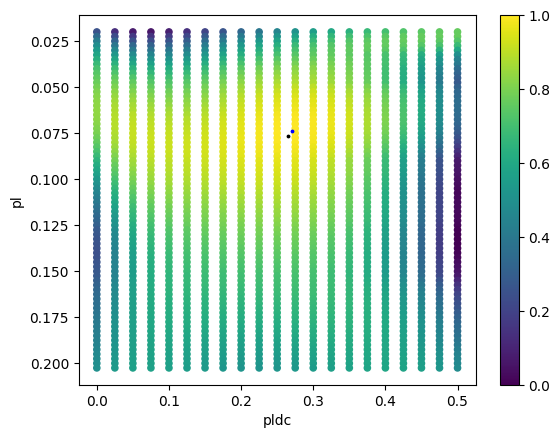

In [24]:
tables = [table2, table3, table5_mono, table5_di]
type_list = [1,1,2,3]
rows_in_dataset_list = [1,5,1,1]
PL,PLDC, vals, max_cord, max_likelihood = make_grid(tables, type_list, rows_in_dataset_list)

plt.scatter(PLDC, PL, c=vals, s= 20)
plt.scatter(0.2649, 0.0767, s= 3, c = "k") # mcmanus' point in black
plt.scatter(*max_cord, s=3, c="b") #point found by the code
plt.gca().invert_yaxis()
plt.xlabel('pldc')
plt.ylabel('pl')
plt.colorbar()
plt.show()

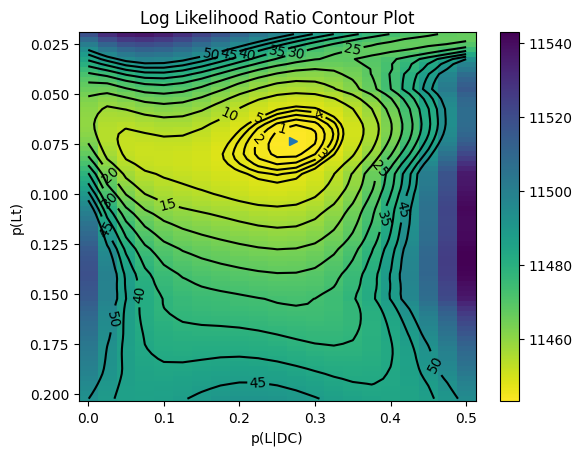

Maximum Log-Likelihood: -11443.219143825136
Coordinates of Maximum Likelihood: pldc =0.2712057876941146, pl=0.07365273737422325


In [25]:
ratio= max_likelihood-vals #(vals-abs(max_likelihood))
fig = plt.figure()
ax = fig.add_subplot()
# contour = ax.contourf(pldc, pl, vals, 50, cmap='viridis')
L_DC = np.arange(0, 0.525, 0.025)
L_T = np.arange(0.02, 0.2025, 0.0025)
im = ax.pcolormesh(L_DC, L_T, -vals.T, cmap='viridis_r' )
cs = ax.contour(L_DC, L_T, ratio.T, colors='k', levels = [1,2,3,4,5,10,15,20,25,30,35,40,45,50])
plt.clabel(cs)
ax.invert_yaxis()

# Add a colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('p(L|DC)')
ax.set_ylabel('p(Lt)')
ax.set_title('Log Likelihood Ratio Contour Plot')
# ax.plot(*(0.2649, 0.0767), "-p") #mcmanus's  A Apoint
# ax.plot(*(0.2328,0.0642), "-p") #mcmanus's  B Apoint
ax.plot(*max_cord, ">") # our A point
plt.show()
print(f"Maximum Log-Likelihood: {max_likelihood}")
print(f"Coordinates of Maximum Likelihood: pldc ={max_cord[0]}, pl={max_cord[1]}")

### 3d Ratio map

In [26]:

surface = go.Surface(x=PLDC, y=PL, z=vals, surfacecolor=vals)
max_point = go.Scatter3d(x=[max_cord[0]], y=[max_cord[1]], z=[max_likelihood], mode='markers+text', marker=dict(size=4, color='blue'),text=['Max'], textposition='top center')
mc_point = go.Scatter3d(x=[0.2647], y=[0.0767], z=[log_likelihood_model(tables,measured_tables,rows_in_dataset_list,type_list,0.2647,0.0767)], mode='markers+text', marker=dict(size=4, color='red'),text=['McManus'], textposition='top center')
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='p(L|DC)'),
        yaxis=dict(title='p(Lt)'),
        zaxis=dict(title='log likelihood val')
    ))
fig = go.Figure([surface,max_point,mc_point],layout)
fig.update_layout(width=800, height=600)
fig.show()

##  The statistical test

Using Wilk's lambda we can asses goodness of fit of the model to the data

$\chi^2= -2 \sum {N_{H|H_1\times H_2}}(ln(p_{exp}(H|H_1\times H_2))-ln(p_{obs}(H|H_1\times H_2)))$

In [27]:
def calc_empirical_probs(table, columns_per_block):
    """
    :param table: table of observed probabilities
    :param columns_per_block: number of columns in one block (one type of parents pairing/ 3 for twins)
    :type columns_per_block: int
    :return: table representing the empirical probabilities.
    """
    res =[]
    blocks = len(table[0])//columns_per_block
    for row in table:
        sums = [np.nansum(row[columns_per_block*i: (i+1)*columns_per_block]) for i in range(blocks)]
        prob_row =[]
        for index, val in enumerate(row):
            if val == 0:
                prob_row.append(0)
            else:
                prob_row.append(val/sums[index//columns_per_block])
        res.append(prob_row)
    return np.vstack(res)

In [28]:
table2_prob = calc_empirical_probs(table2, 2)
table3_prob = calc_empirical_probs(table3, 6)
table5_mono_prob = calc_empirical_probs(table5_mono, 3)
table5_di_prob = calc_empirical_probs(table5_di, 3)

# calculate the support of perfect-fit
table2_perfit = np.array([log_like(table2[i],table2_prob[i]) for i in range(len(table2))])
table3_perfit = np.array([log_like(table3[5*i:5*(i+1)],table3_prob[5*i:5*(i+1)]) for i in range(len(table3)//5)])
table5_mono_perfit = np.array([log_like(table5_mono[i],table5_mono_prob[i]) for i in range(len(table5_mono))])
table5_di_perfit = np.array([log_like(table5_di[i],table5_di_prob[i]) for i in range(len(table5_di))])


In [29]:
print(f"score of perfect fit = {np.sum(table2_perfit) + np.sum(table3_perfit) + np.sum(table5_mono_perfit) + np.sum(table5_di_perfit)}")

score of perfect fit = -11322.317179414418


using the expected probabiliries we can check the fit of each daraset to the model

In [30]:
pl = 0.0725
pldc = 0.25

In [31]:

table2_exp, table2_exp_prob = calc_exp_table(table2, table2_mes, pl, pldc, 1, 1)
table3_exp, table3_exp_prob = calc_exp_table(table3, table3_mes, pl, pldc, 5, 1)
table5_mono_exp, table5_mono_exp_prob = calc_exp_table(table5_mono, table5_mono_mes, pl, pldc, 1, 2)
table5_di_exp, table5_di_exp_prob = calc_exp_table(table5_di, table5_di_mes,pl, pldc, 1, 3)

In [32]:
table2_chi = -2 * (np.array([log_like(table2[i],table2_exp_prob[i]) for i in range(len(table2))]) - table2_perfit)
table2_pval = chi2.sf(table2_chi, df =1)
table2_sig = table2_pval < 0.05

table3_chi = -2 * (np.array([log_like(table3[5*i:5*(i+1)],table3_exp_prob[5*i:5*(i+1)]) for i in range(4)]) - table3_perfit)
table3_pval = np.array([chi2.sf(table3_chi[i], [44,27,28,34][i]) for i in range(4)])
table3_sig = table3_pval < 0.05

table5_mono_chi = -2 * (np.array([log_like(table5_mono[i],table5_mono_exp_prob[i]) for i in range(len(table5_mono))]) - table5_mono_perfit)
table5_mono_pval = chi2.sf(table5_mono_chi, df =1)
table5_mono_sig = table5_mono_pval < 0.05


table5_di_chi = -2 * (np.array([log_like(table5_di[i],table5_di_exp_prob[i]) for i in range(len(table5_di))]) - table5_di_perfit)
table5_di_pval = chi2.sf(table5_di_chi, df =1)
table5_di_sig = table5_di_pval < 0.05

## Summary of the results in tables

In [33]:
pd.DataFrame(table2_exp).to_csv("t2.2.csv")
pd.DataFrame(table3_exp).to_csv("t3.2.csv")
pd.DataFrame(table5_di_exp).to_csv("t5d.2.csv")
pd.DataFrame(table5_mono_exp).to_csv("t5m.2.csv")

In [34]:
data2 = np.concatenate([table2_mes.reshape((-1,2)), 
                        table2,
                        table2_exp,
                        table2_chi.reshape((-1,1)),
                        table2_pval.reshape((-1,1)),
                        table2_sig.reshape((-1,1))], axis=1)
t2 = pd.DataFrame(data2,
                  index= table2_names,
                  columns = ["p(Lm prog)", "p(Lm par)"] + [f" {dtype} {child}|{parents}" for dtype in ["obs", "exp"] for parents in["RR", "RL", "LL"] for child in["R", "L"] ]+["chi", "p-value", "sig?"])[
                      ["p(Lm prog)", "p(Lm par)"] + [f" {dtype} {child}|{parents}"  for parents in["RR", "RL", "LL"] for child in["R", "L"] for dtype in ["obs", "exp"]] +["chi", "p-value", "sig?"]
                  ]
t2["sig?"] = t2["sig?"].astype(bool)
print("Table 2. The results of 12 studies of the frequency of right- and left-handed progeny from Rx R, Rx L and LxL matings")
print(f'overall table chi score = {np.sum(table2_chi)}, p-value = {chi2.sf(np.sum(table2_chi), df =12)}')
display(t2)

Table 2. The results of 12 studies of the frequency of right- and left-handed progeny from Rx R, Rx L and LxL matings
overall table chi score = 53.86385683990308, p-value = 2.889965915401732e-07


,p(Lm prog),p(Lm par),obs R|RR,exp R|RR,obs L|RR,exp L|RR,obs R|RL,exp R|RL,obs L|RL,exp L|RL,obs R|LL,exp R|LL,obs L|LL,exp L|LL,chi,p-value,sig?
Ramaley 1913,0.155615,0.080902,841.0,821.774230,115.0,134.225770,113.0,127.853139,54.0,39.146861,1.0,5.372631,7.0,2.627369,20.528207,0.000006,True
Chamberlain 1928,0.047705,0.033316,6917.0,6915.350152,308.0,309.649848,411.0,410.358707,53.0,53.641293,18.0,20.291141,7.0,4.708859,1.255148,0.262572,False
Rife 1940,0.087695,0.044995,1842.0,1837.966104,151.0,155.033896,140.0,141.311272,34.0,32.688728,5.0,7.722624,6.0,3.277376,3.088278,0.078858,False
Merrell 1975,0.236287,0.154008,140.0,135.279920,34.0,38.720080,33.0,38.838682,20.0,14.161318,8.0,6.881398,2.0,3.118602,4.452801,0.034844,True
Annett 1973,0.106326,0.040658,6206.0,6204.017342,669.0,670.982658,471.0,473.856341,125.0,122.143659,5.0,4.126317,1.0,1.873683,0.754747,0.384978,False
Ferronato et al. 1974,0.097561,0.097561,154.0,151.584805,11.0,13.415195,31.0,33.415195,9.0,6.584805,0.0,0.000000,0.0,0.000000,1.474646,0.224614,False
Mascie-Taylor (unpub),0.083056,0.093023,232.0,232.431932,17.0,16.568068,41.0,40.544498,7.0,7.455502,3.0,3.023570,1.0,0.976430,0.046228,0.829761,False
Chaurasia & Groswani(unpub),0.140682,0.065990,1060.0,1051.465348,144.0,152.534652,122.0,128.905683,46.0,39.094317,3.0,4.628970,4.0,2.371030,3.667697,0.055477,False
Annett 1978,0.085000,0.054500,1656.0,1655.898495,130.0,130.101505,170.0,171.284982,40.0,38.715018,4.0,2.816523,0.0,1.183477,2.858265,0.090906,False
Carter-Saltzmann 1980,0.130000,0.075000,303.0,301.128616,37.0,38.871384,45.0,46.871384,15.0,13.128616,0.0,0.000000,0.0,0.000000,0.433822,0.510119,False


In [35]:
# Create a multi-index
index = pd.MultiIndex.from_product([table3_names, [1, 2, 3, 4, 5]], names=['dataset', 'fanily size'])

data3 = np.concatenate([np.array([row for row in table3_mes for _ in range(5)]).reshape((-1,2)),
                        table3,
                        np.around(table3_exp,2),
                        np.array([row for row in table3_chi for _ in range(5)]).reshape((-1,1)),
                        np.array([row for row in table3_pval for _ in range(5)]).reshape((-1,1)),
                        np.array([row for row in table3_sig for _ in range(5)]).reshape((-1,1))], axis =1)
t3 = pd.DataFrame(data3,
                  index=index,
                  columns=["p(Lm prog)", "p(Lm par)"] + [f" {dtype} {num}|{parents}" for dtype in ["obs", "exp"] for parents in["RxR", "RxL", "LxL"] for num in range(6) ]+["chi", "p-value", "sig?"])[
                      ["p(Lm prog)", "p(Lm par)"] + [f" {dtype} {num}|{parents}" for parents in["RxR", "RxL", "LxL"] for num in range(6) for dtype in ["obs", "exp"]]+["chi", "p-value", "sig?"]
                  ]
t3["sig?"] = t3["sig?"].astype(bool)
print("Table 3. The numbers of families with particular numbers of left-handed children by family size and parental handedness for 4 separate data stes")
print(f'overall table chi score = {np.sum(table3_chi)}, p-value = {chi2.sf(np.sum(table3_chi), df =133)}')
display(t3)


Table 3. The numbers of families with particular numbers of left-handed children by family size and parental handedness for 4 separate data stes
overall table chi score = 153.7424105558248, p-value = 0.10537627602841498


p(Lm prog)  p(Lm par)   obs 0|RxR  \
dataset               fanily size                                      
ICM1(propositi)       1              0.151830   0.100478        58.0   
                      2              0.151830   0.100478       211.0   
                      3              0.151830   0.100478       123.0   
                      4              0.151830   0.100478        70.0   
                      5              0.151830   0.100478         9.0   
ICM2(propositi)       1              0.133992   0.101023       134.0   
                      2              0.133992   0.101023        91.0   
                      3              0.133992   0.101023        22.0   
                      4              0.133992   0.101023        10.0   
                      5              0.133992   0.101023         4.0   
ICM2(maternal family) 1              0.089302   0.060890        74.0   
                      2              0.089302   0.060890       107.0   
                      3              0.089302   0.060890        81.0   
                      4              0.089302   0.060890        31.0   
                      5              0.089302   0.060890        19.0   
ICM2 paternal family  1              0.090539   0.046798        86.0   
                      2              0.090539   0.046798       100.0   
                      3              0.090539   0.046798        65.0   
                      4              0.090539   0.046798        39.0   
                      5              0.090539   0.046798        13.0   

                                    exp 0|RxR   obs 1|RxR   exp 1|RxR  \
dataset               fanily size                                       
ICM1(propositi)       1                 57.85         9.0        9.15   
                      2                203.43        57.0       61.13   
                      3                126.06        63.0       54.20   
                      4                 66.97        39.0       36.77   
                      5                 14.79        12.0        9.76   
ICM2(propositi)       1                131.36        15.0       17.64   
                      2                 90.00        22.0       22.78   
                      3                 21.66         7.0        7.78   
                      4                  9.41         5.0        4.29   
                      5                  2.26         0.0        1.23   
ICM2(maternal family) 1                 72.10         4.0        5.90   
                      2                110.15        18.0       16.33   
                      3                 81.43        16.0       16.44   
                      4                 31.91        10.0        7.83   
                      5                 20.14         7.0        5.65   
ICM2 paternal family  1                 82.78         4.0        7.22   
                      2                108.26        27.0       17.10   
                      3                 62.04        11.0       13.35   
                      4                 38.82        11.0       10.15   
                      5                 16.20         9.0        4.85   

                                    obs 2|RxR   exp 2|RxR   obs 3|RxR  \
dataset               fanily size                                       
ICM1(propositi)       1                   NaN         NaN         NaN   
                      2                   3.0        6.44         NaN   
                      3                   6.0       10.76         0.0   
                      4                   6.0       10.34         1.0   
                      5                   6.0        3.47         2.0   
ICM2(propositi)       1                   NaN         NaN         NaN   
                      2                   2.0        2.23         NaN   
                      3                   0.0        1.43         2.0   
                      4                   0.0        1.11         0.0   
                      5                 

In [36]:
data5_mono = np.concatenate([table5_mono_mes.reshape((-1,1)), 
                        table5_mono,
                        np.around(table5_mono_exp,1),
                        table5_mono_chi.reshape((-1,1)),
                        table5_mono_pval.reshape((-1,1)),
                        table5_mono_sig.reshape((-1,1))], axis=1)
t5_mono = pd.DataFrame(data5_mono,
                  index= table5_names,
                  columns = ["p(Lm)"] + [f"{dtype} {phens}" for dtype in ["obs", "exp"] for phens in ["RR", "RL", "LL" ]]+["chi", "p-value", "sig?"])[
                      ["p(Lm)"] + [f"{dtype} {phens}"  for phens in["RR", "RL", "LL"]  for dtype in ["obs", "exp"]] +["chi", "p-value", "sig?"]
                  ]
t5_mono['sig?'] = t5_mono['sig?'].astype(bool)
print("Table 5 The observed numbers ofR-R, R-L and L-L pairs of MZ and DZ twins from 13 different studies")
print(f"overall chi = {np.sum(table5_mono_chi)+ np.sum(table5_di_chi)}, p={chi2.sf(np.sum(table5_mono_chi) + np.sum(table5_di_chi), df =26)}")
print(f'\noverall table chi score = {np.sum(table5_mono_chi)}, p-value = {chi2.sf(np.sum(table5_mono_chi), df =13)}')
display(t5_mono)

data5_di = np.concatenate([table5_di_mes.reshape((-1,1)), 
                        table5_di,
                        np.around(table5_di_exp,1),
                        table5_di_chi.reshape((-1,1)),
                        table5_di_pval.reshape((-1,1)),
                        table5_di_sig.reshape((-1,1))], axis=1)
t5_di = pd.DataFrame(data5_di,
                  index= table5_names,
                  columns = ["p(Lm)"] + [f"{dtype} {phens}" for dtype in ["obs", "exp"] for phens in ["RR", "RL", "LL" ]]+["chi", "p-value", "sig?"])[
                      ["p(Lm)"] + [f"{dtype} {phens}"  for phens in["RR", "RL", "LL"]  for dtype in ["obs", "exp"]] +["chi", "p-value", "sig?"]
                  ]
t5_di['sig?'] = t5_di['sig?'].astype(bool)
print(f'overall table chi score = {np.sum(table5_di_chi)}, p-value = {chi2.sf(np.sum(table5_di_chi), df =13)}')
display(t5_di)

Table 5 The observed numbers ofR-R, R-L and L-L pairs of MZ and DZ twins from 13 different studies
overall chi = 35.18803818675526, p=0.10764242832893042

overall table chi score = 11.617037861949584, p-value = 0.5592686273462296


,p(Lm),obs RR,exp RR,obs RL,exp RL,obs LL,exp LL,chi,p-value,sig?
Wilson & Jones (1932),0.107143,56.0,56.8,13.0,11.4,1.0,1.8,6.635967e-01,0.415293,False
Stocks (1933),0.095238,35.0,35.0,6.0,6.0,1.0,1.0,1.521572e-07,0.999689,False
Newman et al. (1937),0.190000,34.0,33.4,13.0,14.2,3.0,2.4,2.575141e-01,0.611833,False
Bouterwek (1938),0.188525,80.0,81.8,38.0,34.4,4.0,5.8,1.013581e+00,0.314046,False
Rife (1940),0.118834,176.0,176.3,41.0,40.5,6.0,6.3,1.913844e-02,0.889970,False
Thyss (1946),0.184466,72.0,69.7,24.0,28.5,7.0,4.7,1.769985e+00,0.183384,False
Rife (1950),0.128280,261.0,265.3,76.0,67.3,6.0,10.3,3.293683e+00,0.069547,False
Dechaume (1957),0.242424,19.0,19.3,12.0,11.4,2.0,2.3,6.721894e-02,0.795430,False
Zazzo (1960),0.133205,199.0,198.1,51.0,52.8,9.0,8.1,1.622578e-01,0.687086,False
Carter-Saltzmann et al. (1976),0.171123,132.0,130.8,46.0,48.4,9.0,7.8,3.129071e-01,0.575902,False


overall table chi score = 23.571000324805674, p-value = 0.03531329709035086


,p(Lm),obs RR,exp RR,obs RL,exp RL,obs LL,exp LL,chi,p-value,sig?
Wilson & Jones (1932),0.113821,97.0,97.5,24.0,23.1,2.0,2.5,0.132233,0.716128,False
Stocks (1933),0.106383,76.0,75.7,16.0,16.5,2.0,1.7,0.054509,0.815396,False
Newman et al. (1937),0.110000,39.0,40.0,11.0,9.1,0.0,1.0,2.328314,0.127039,False
Bouterwek (1938),0.171429,23.0,24.2,12.0,9.5,0.0,1.2,3.156561,0.075622,False
Rife (1940),0.154110,104.0,105.4,39.0,36.2,3.0,4.4,0.740127,0.389620,False
Thyss (1946),0.162791,60.0,60.8,24.0,22.4,2.0,2.8,0.396011,0.529157,False
Rife (1950),0.116114,164.0,166.3,45.0,40.3,2.0,4.3,2.121136,0.145279,False
Dechaume (1957),0.196970,21.0,21.5,11.0,10.1,1.0,1.5,0.267152,0.605249,False
Zazzo (1960),0.108955,264.0,268.4,69.0,60.3,2.0,6.4,5.393247,0.020215,True
Carter-Saltzmann et al. (1976),0.193182,115.0,115.6,54.0,52.8,7.0,7.6,0.078884,0.778816,False


## running the model as whole

In [37]:
def run_model(tables, type_list, rows_in_dataset_list):
    

    # create contour map to present the likelihood estemation for pairs of parameters in the model
    PL,PLDC, vals, max_cord, max_likelihood = make_grid(tables, type_list, rows_in_dataset_list)

    ratio= max_likelihood-vals #(vals-abs(max_likelihood))
    fig = plt.figure()
    ax = fig.add_subplot()
    # contour = ax.contourf(pldc, pl, vals, 50, cmap='viridis')
    L_DC = np.arange(0, 0.525, 0.025)
    L_T = np.arange(0.02, 0.2025, 0.0025)
    im = ax.pcolormesh(L_DC, L_T, -vals.T, cmap='viridis_r' )
    cs = ax.contour(L_DC, L_T, ratio.T, colors='k', levels = [1,2,3,4,5,10,15,20,25,30,35,40,45,50])
    plt.clabel(cs)
    ax.invert_yaxis()

    # Add a colorbar
    cbar = plt.colorbar(im)

    # Add labels and title
    ax.set_xlabel('p(L|DC)')
    ax.set_ylabel('p(Lt)')
    ax.set_title('Log Likelihood Ratio Contour Plot')
    ax.plot(*max_cord, ">") # our A point
    plt.show()
    print(f"Maximum Log-Likelihood: {max_likelihood}")
    print(f"Coordinates of Maximum Likelihood: pldc ={max_cord[0]}, pl={max_cord[1]}")
    
    #3d
    surface = go.Surface(x=PLDC, y=PL, z=vals, surfacecolor=vals)
    max_point = go.Scatter3d(x=[max_cord[0]], y=[max_cord[1]], z=[max_likelihood], mode='markers+text', marker=dict(size=4, color='blue'),text=['Max'], textposition='top center')
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='p(L|DC)'),
            yaxis=dict(title='p(Lt)'),
            zaxis=dict(title='log likelihood val')
        ))
    fig = go.Figure([surface,max_point],layout)
    fig.update_layout(width=800, height=600)
    fig.show()

    # calculate if the model fits the overall data
    perfits = []
    for i, table in enumerate(tables):
        if type_list[i] == 1:
            prob = calc_empirical_probs(table, len(table[0])//3)
            r_in_ds = rows_in_dataset_list[i]
            perfits.append(np.array([log_like(table[r_in_ds*j:r_in_ds*(j+1)],prob[r_in_ds*j:r_in_ds*(j+1)]) for j in range(len(table)//r_in_ds)]))
        else:
            prob = calc_empirical_probs(table, 3)
            perfits.append(np.array([log_like(table[j],prob[j]) for j in range(len(table))]))

    perfit = np.nansum([np.nansum(table) for table in perfits])
    print(f"perfect fit score: {perfit}")
    print(f"")
    print(f"chi square: {-2*(max_likelihood-perfit)}")

    

## Model A

Model A


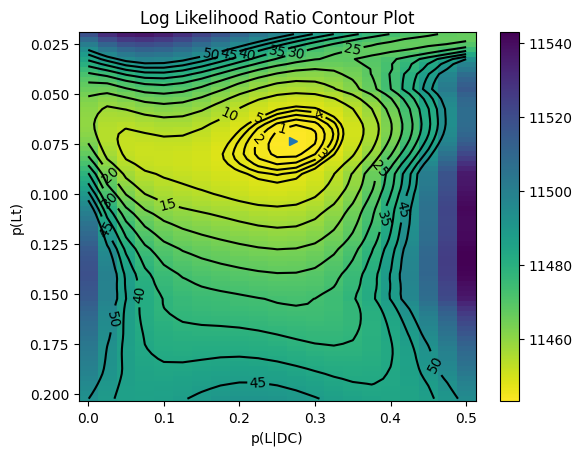

Maximum Log-Likelihood: -11443.219143825136
Coordinates of Maximum Likelihood: pldc =0.2712057876941146, pl=0.07365273737422325


perfect fit score: -11322.317179414418

chi square: 241.80392882143497


In [38]:
table2 = np.array([
    [841,  115,   113,   54,    1,     7],  # Ramaley 1913
    [6917, 308,   411,   53,    18,    7],  # Chamberlain 1928
    [1842, 151,   140,   34,    5,     6],  # Rife 1940
    [140,  34,    33,    20,    8,     2],  # Merrell 1975
    [6206, 669,   471,   125,   5,     1],  # Annett 1973
    [154,  11,    31,    9,     0,     0],  # Ferronato et al. 1947
    [232,  17,    41,    7,     3,     1],  # Mascie-Taylor (unpub, in McManus 1985)
    [1060, 144,   122,   46,    3,     4],  # Chaurasia & Groswani (unpub, in McManus 1985)
    [1656, 130,   170,   40,    4,     0],  # Annett 1978
    [303,  37,    45,    15,    0,     0],  # Carter-Saltzmann 1980
    [315,  68,    57,    16,    0,     0],  # Coren & Porac 1980
    [848,  211,   325,   150,   30,   22]   # McGee & Cozad 1980
])

table3 = np.array([
[  58,   9,  np.nan,  np.nan,  np.nan,  np.nan,  14,   5,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,  np.nan,  np.nan,  np.nan,  np.nan],
[  211,  57, 3,       np.nan,  np.nan,  np.nan,  35,  16,   5,       np.nan,  np.nan,  np.nan,   0, 0,   1,      np.nan,  np.nan,  np.nan],
[  123,  63, 6,       0,       np.nan,  np.nan,  22,  24,   6,       1,       np.nan,  np.nan,   2, 1,   1,      0,       np.nan,  np.nan],
[  70,   39, 6,       1,       0,       np.nan,   8,   8,   7,       1,       0,       np.nan,   0, 0,   1,      0,       0,       np.nan],
[  9,    12, 6,       2,       0,       0,        1,   0,   0,       1,       0,       0,        1, 0,   0,      0,       0,            0],
[  134,  15, np.nan,  np.nan,  np.nan,  np.nan,  17,   9,   np.nan,  np.nan,  np.nan,  np.nan,   1, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  91,   22, 2,       np.nan,  np.nan,  np.nan,  19,   3,   3,       np.nan,  np.nan,  np.nan,   0, 0,   0,      np.nan,  np.nan,  np.nan],
[  22,   7,  0,       2,       np.nan,  np.nan,   6,  11,   3,       0,       np.nan,  np.nan,   0, 0,   0,      0,       np.nan,  np.nan],
[  10,   5,  0,       0,       0,       np.nan,   3,   1,   0,       0,       0,       np.nan,   1, 0,   0,      0,       0,       np.nan],
[  4,    0,  0,       0,       0,       0,        0,   0,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0],
[  74,   4,  np.nan,  np.nan,  np.nan,  np.nan,   6,   2,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  107,  18, 3,       np.nan,  np.nan,  np.nan,  11,   3,   0,       np.nan,  np.nan,  np.nan,   2, 0,   0,      np.nan,  np.nan,  np.nan],
[  81,   16, 4,       0,       np.nan,  np.nan,  16,   1,   0,       2,       np.nan,  np.nan,   0, 0,   0,      0,       np.nan,  np.nan],
[  31,   10, 1,       0,       0,       np.nan,   0,   0,   0,       2,       0,       np.nan,   0, 0,   0,      0,       0,       np.nan],
[  19,   7,  1,       1,       0,       0,        3,   2,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0],
[  86,   4,  np.nan,  np.nan,  np.nan,  np.nan,   8,   1,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  100,  27, 0,       np.nan,  np.nan,  np.nan,   7,   5,   0,       np.nan,  np.nan,  np.nan,   0, 1,   0,      np.nan,  np.nan,  np.nan],
[  65,  11,  2,       0,       np.nan,  np.nan,   4,   3,   2,       0,       np.nan,  np.nan,   0, 1,   0,      0,       np.nan,  np.nan],
[  39,  11,  2,       0,       0,       np.nan,   2,   1,   0,       0,       0,       np.nan,   0, 0,   0,      0,       0,       np.nan],
[  13,   9,  1,       0,       0,       0,        0,   1,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0]
])

table5_mono = np.array([
    [56,  13,   1], # Wilson & Jones (1932)
    [35,  6,    1], # Stocks (1933)
    [34,  13,   3], # Newman et al. (1937)
    [80,  38,   4], # Bouterwek (1938)
    [176, 41,   6], # Rife (1940)
    [72,  24,   7], # Thyss (1946)
    [261, 76,   6], # Rife (1950)
    [19,  12,   2], # Dechaume (1957)
    [199, 51,   9], # Zazzo (1960)
    [132, 46,   9], # Carter-Saltzmann et al. (1976)
    [380, 123, 11], # Loehlin & Nichols (1976)
    [53,  19,   3], # Springer & Searleman (1978)
    [32,   9,   2]  # NCDS (unpublished)
])
table5_di = np.array([
    [97,  24,   2], # Wilson & Jones (1932)
    [76,  16,   2], # Stocks (1933)
    [39,  11,   0], # Newman et al. (1937)
    [23,  12,   0], # Bouterwek (1938)
    [104, 39,   3], # Rife (1940)
    [60,  24,   2], # Thyss (1946)
    [164, 45,   2], # Rife (1950)
    [21,  11,   1], # Dechaume (1957)
    [264, 69,   2], # Zazzo (1960)
    [115, 54,   7], # Carter-Saltzmann et al. (1976)
    [261, 70,   2], # Loehlin & Nichols (1976)
    [35,  9,    3], # Springer & Searleman (1978)
    [66,  18,   4]  # NCDS (unpublished)
])

print("Model A")
tables = [table2, table3, table5_mono, table5_di]
type_list = [1,1,2,3]
rows_in_dataset_list = [1,5,1,1]

run_model(tables, type_list, rows_in_dataset_list)

In [39]:
# chi2

table2_mes = np.array([calc_measured_fam([row]) for row in table2])
table3_mes = np.array([calc_measured_fam(table3[i*5:5*(1+i)]) for i in range(4)])
table5_mono_mes = np.array([calc_measured_twin(row) for row in table5_mono])
table5_di_mes =  np.array([calc_measured_twin(row) for row in table5_di])
measured_tables = [table2_mes, table3_mes, table5_mono_mes, table5_di_mes]

table2_exp, table2_exp_prob = calc_exp_table(table2, table2_mes, pl, pldc, 1, 1)
table3_exp, table3_exp_prob = calc_exp_table(table3, table3_mes, pl, pldc, 5, 1)
table5_mono_exp, table5_mono_exp_prob = calc_exp_table(table5_mono, table5_mono_mes, pl, pldc, 1, 2)
table5_di_exp, table5_di_exp_prob = calc_exp_table(table5_di, table5_di_mes, pl, pldc, 1, 3)

table2_prob = calc_empirical_probs(table2, 2)
table3_prob = calc_empirical_probs(table3, 6)
table5_mono_prob = calc_empirical_probs(table5_mono, 3)
table5_di_prob = calc_empirical_probs(table5_di, 3)

table2_perfit = np.array([log_like(table2[i],table2_prob[i]) for i in range(len(table2))])
table3_perfit = np.array([log_like(table3[5*i:5*(i+1)],table3_prob[5*i:5*(i+1)]) for i in range(4)])
table5_mono_perfit = np.array([log_like(table5_mono[i],table5_mono_prob[i]) for i in range(len(table5_mono))])
table5_di_perfit = np.array([log_like(table5_di[i],table5_di_prob[i]) for i in range(len(table5_di))])

table2_chi = -2 * (np.array([log_like(table2[i],table2_exp_prob[i]) for i in range(len(table2))]) - table2_perfit)
table2_pval = chi2.sf(table2_chi, df =1)

table3_chi = -2 * (np.array([log_like(table3[5*i:5*(i+1)],table3_exp_prob[5*i:5*(i+1)]) for i in range(4)]) - table3_perfit)



table5_mono_chi = -2 * (np.array([log_like(table5_mono[i],table5_mono_exp_prob[i]) for i in range(len(table5_mono))]) - table5_mono_perfit)

table5_di_chi = -2 * (np.array([log_like(table5_di[i],table5_di_exp_prob[i]) for i in range(len(table5_di))]) - table5_di_perfit)


print(f'Table 2:overall table chi score = {np.sum(table2_chi)}, p-value = {chi2.sf(np.sum(table2_chi), df = 12)}')
print(f'Table 3: overall table chi score = {np.sum(table3_chi)}, p-value = {chi2.sf(np.sum(table3_chi), df =133)}')
print(f'Table 5:overall table chi score = {np.sum(table5_mono_chi)+np.sum(table5_di_chi)}, p-value = {chi2.sf(np.sum(table5_mono_chi)+np.sum(table5_di_chi), df =26)}')
print(f'Table 5 MZ:overall table chi score = {np.sum(table5_mono_chi)}, p-value = {chi2.sf(np.sum(table5_mono_chi), df =13)}')
print(f'Table 5 DZ:overall table chi score = {np.sum(table5_di_chi)}, p-value = {chi2.sf(np.sum(table5_di_chi), df =13)}')


Table 2:overall table chi score = 53.86385683990308, p-value = 2.889965915401732e-07
Table 3: overall table chi score = 153.7424105558248, p-value = 0.10537627602841498
Table 5:overall table chi score = 35.18803818675526, p-value = 0.10764242832893042
Table 5 MZ:overall table chi score = 11.617037861949584, p-value = 0.5592686273462296
Table 5 DZ:overall table chi score = 23.571000324805674, p-value = 0.03531329709035086


Maximum Log-Likelihood: -11443.219143825136
Coordinates of Maximum Likelihood: pldc =0.2712057876941146, pl=0.07365273737422325


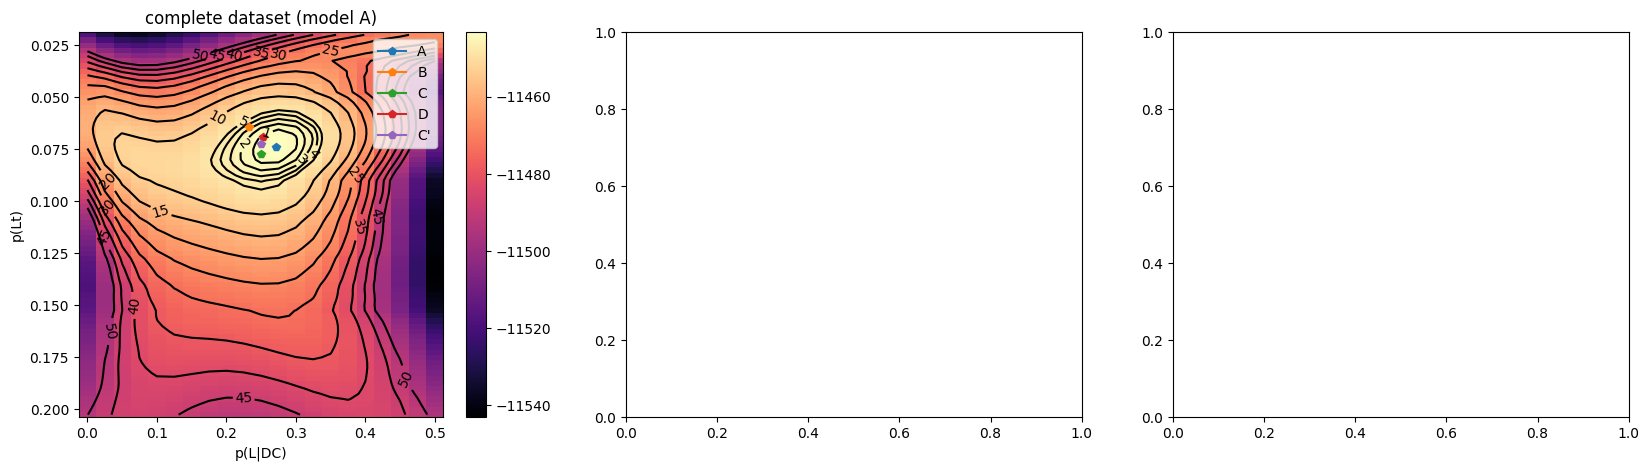

In [40]:
comp,axes = plt.subplots(1,3,figsize=(20,5))
PL,PLDC, vals, max_cord, max_likelihood = make_grid(tables, type_list, rows_in_dataset_list)
ratio= max_likelihood-vals #(vals-abs(max_likelihood))
ax = axes[0]

L_DC = np.arange(0, 0.525, 0.025)
L_T = np.arange(0.02, 0.2025, 0.0025)
im = ax.pcolormesh(L_DC, L_T, vals.T, cmap='magma' )
cs = ax.contour(L_DC, L_T, ratio.T, colors='k', levels = [1,2,3,4,5,10,15,20,25,30,35,40,45,50])
plt.clabel(cs)
ax.invert_yaxis()

# Add a colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('p(L|DC)')
ax.set_ylabel('p(Lt)')
# ax.set_title('Log Likelihood Ratio Contour Plot, Model D')
ax.plot(*(0.2712, 0.0737), "-p", label="A" ) #our  A Apoint
ax.plot(*(0.2328, 0.0645), "-p", label ="B") #our  B Apoint
ax.plot(*(0.25, 0.0775), "-p", label="C" ) # our  C Apoint
ax.plot(*(0.252, 0.069), "-p", label ="D") # our  D Apoint
ax.plot(*(0.25, 0.0725), "-p", label="C'" ) # our  C Apoint
ax.set_title("complete dataset (model A)")
ax.legend()

print(f"Maximum Log-Likelihood: {max_likelihood}")
print(f"Coordinates of Maximum Likelihood: pldc ={max_cord[0]}, pl={max_cord[1]}")

## Model B - 4 data sets removed

Model B


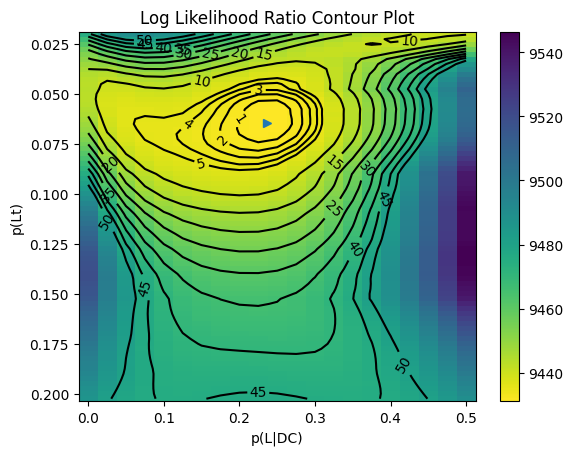

Maximum Log-Likelihood: -9430.95838460528
Coordinates of Maximum Likelihood: pldc =0.23706062295513766, pl=0.06450638022077043


perfect fit score: -9332.08494187086

chi square: 197.74688546883772


In [41]:
table2 = np.array([
 
    [6917, 308,   411,   53,    18,    7],  # Chamberlain 1928
    [1842, 151,   140,   34,    5,     6],  # Rife 1940
    [6206, 669,   471,   125,   5,     1],  # Annett 1973
    [154,  11,    31,    9,     0,     0],  # Ferronato et al. 1947
    [232,  17,    41,    7,     3,     1],  # Mascie-Taylor (unpub, in McManus 1985)
    [1656, 130,   170,   40,    4,     0],  # Annett 1978
    [303,  37,    45,    15,    0,     0],  # Carter-Saltzmann 1980
    [315,  68,    57,    16,    0,     0]   # Coren & Porac 1980

])
table2_names = ["Chamberlain 1928","Rife 1940","Annett 1973", "Ferronato et al. 1947", "Mascie-Taylor (unpub)" , "Annett 1978", "Carter-Saltzmann 1980", "Coren & Porac 1980"]

table3 = np.array([
[  58,   9,  np.nan,  np.nan,  np.nan,  np.nan,  14,   5,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,  np.nan,  np.nan,  np.nan,  np.nan],
[  211,  57, 3,       np.nan,  np.nan,  np.nan,  35,  16,   5,       np.nan,  np.nan,  np.nan,   0, 0,   1,      np.nan,  np.nan,  np.nan],
[  123,  63, 6,       0,       np.nan,  np.nan,  22,  24,   6,       1,       np.nan,  np.nan,   2, 1,   1,      0,       np.nan,  np.nan],
[  70,   39, 6,       1,       0,       np.nan,   8,   8,   7,       1,       0,       np.nan,   0, 0,   1,      0,       0,       np.nan],
[  9,    12, 6,       2,       0,       0,        1,   0,   0,       1,       0,       0,        1, 0,   0,      0,       0,            0],
[  134,  15, np.nan,  np.nan,  np.nan,  np.nan,  17,   9,   np.nan,  np.nan,  np.nan,  np.nan,   1, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  91,   22, 2,       np.nan,  np.nan,  np.nan,  19,   3,   3,       np.nan,  np.nan,  np.nan,   0, 0,   0,      np.nan,  np.nan,  np.nan],
[  22,   7,  0,       2,       np.nan,  np.nan,   6,  11,   3,       0,       np.nan,  np.nan,   0, 0,   0,      0,       np.nan,  np.nan],
[  10,   5,  0,       0,       0,       np.nan,   3,   1,   0,       0,       0,       np.nan,   1, 0,   0,      0,       0,       np.nan],
[  4,    0,  0,       0,       0,       0,        0,   0,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0],
[  74,   4,  np.nan,  np.nan,  np.nan,  np.nan,   6,   2,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  107,  18, 3,       np.nan,  np.nan,  np.nan,  11,   3,   0,       np.nan,  np.nan,  np.nan,   2, 0,   0,      np.nan,  np.nan,  np.nan],
[  81,   16, 4,       0,       np.nan,  np.nan,  16,   1,   0,       2,       np.nan,  np.nan,   0, 0,   0,      0,       np.nan,  np.nan],
[  31,   10, 1,       0,       0,       np.nan,   0,   0,   0,       2,       0,       np.nan,   0, 0,   0,      0,       0,       np.nan],
[  19,   7,  1,       1,       0,       0,        3,   2,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0],
[  86,   4,  np.nan,  np.nan,  np.nan,  np.nan,   8,   1,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  100,  27, 0,       np.nan,  np.nan,  np.nan,   7,   5,   0,       np.nan,  np.nan,  np.nan,   0, 1,   0,      np.nan,  np.nan,  np.nan],
[  65,  11,  2,       0,       np.nan,  np.nan,   4,   3,   2,       0,       np.nan,  np.nan,   0, 1,   0,      0,       np.nan,  np.nan],
[  39,  11,  2,       0,       0,       np.nan,   2,   1,   0,       0,       0,       np.nan,   0, 0,   0,      0,       0,       np.nan],
[  13,   9,  1,       0,       0,       0,        0,   1,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0]
])

table5_mono = np.array([
    [56,  13,   1], # Wilson & Jones (1932)
    [35,  6,    1], # Stocks (1933)
    [34,  13,   3], # Newman et al. (1937)
    [80,  38,   4], # Bouterwek (1938)
    [176, 41,   6], # Rife (1940)
    [72,  24,   7], # Thyss (1946)
    [261, 76,   6], # Rife (1950)
    [19,  12,   2], # Dechaume (1957)
    [199, 51,   9], # Zazzo (1960)
    [132, 46,   9], # Carter-Saltzmann et al. (1976)
    [380, 123, 11], # Loehlin & Nichols (1976)
    [53,  19,   3], # Springer & Searleman (1978)
    [32,   9,   2]  # NCDS (unpublished)
])
table5_di = np.array([
    [97,  24,   2], # Wilson & Jones (1932)
    [76,  16,   2], # Stocks (1933)
    [39,  11,   0], # Newman et al. (1937)
    [23,  12,   0], # Bouterwek (1938)
    [104, 39,   3], # Rife (1940)
    [60,  24,   2], # Thyss (1946)
    [164, 45,   2], # Rife (1950)
    [21,  11,   1], # Dechaume (1957)
    [264, 69,   2], # Zazzo (1960)
    [115, 54,   7], # Carter-Saltzmann et al. (1976)
    [261, 70,   2], # Loehlin & Nichols (1976)
    [35,  9,    3], # Springer & Searleman (1978)
    [66,  18,   4]  # NCDS (unpublished)
])

print("Model B")
tables = [table2, table3, table5_mono, table5_di]
type_list = [1,1,2,3]
rows_in_dataset_list = [1,5,1,1]

max_likelihood = run_model(tables, type_list, rows_in_dataset_list)


Maximum Log-Likelihood: -9430.95838460528
Coordinates of Maximum Likelihood: pldc =0.23706062295513766, pl=0.06450638022077043


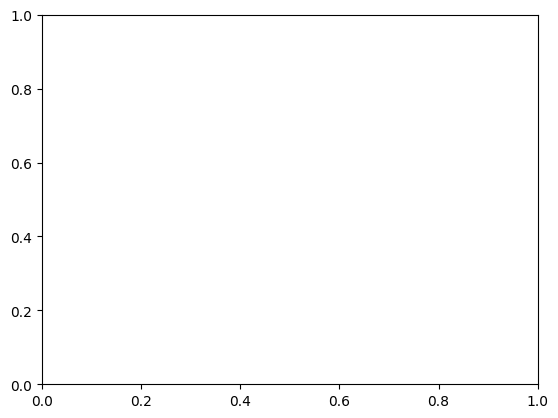

In [42]:
PL,PLDC, vals, max_cord, max_likelihood = make_grid(tables, type_list, rows_in_dataset_list)
ratio= max_likelihood-vals #(vals-abs(max_likelihood))
ax = axes[1]

L_DC = np.arange(0, 0.525, 0.025)
L_T = np.arange(0.02, 0.2025, 0.0025)
im = ax.pcolormesh(L_DC, L_T, vals.T, cmap='magma')
cs = ax.contour(L_DC, L_T, ratio.T, colors='k', levels = [1,2,3,4,5,10,15,20,25,30,35,40,45,50])
plt.clabel(cs)
ax.invert_yaxis()

# Add a colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('p(L|DC)')
ax.set_ylabel('p(Lt)')
# ax.set_title('Log Likelihood Ratio Contour Plot, Model D')
ax.plot(*(0.2712, 0.0737), "-p", label="A" ) #our  A point
ax.plot(*(0.2328, 0.0645), "-p", label ="B") #our  B point
ax.plot(*(0.25, 0.0775), "-p", label="C" ) # C point

ax.plot(*(0.252, 0.069), "-p", label ="D") # our  D point
ax.plot(*(0.25, 0.0725), "-p", label="C'" ) # our  C' point
ax.set_title("reduced dataset (model B)")
ax.legend()

print(f"Maximum Log-Likelihood: {max_likelihood}")
print(f"Coordinates of Maximum Likelihood: pldc ={max_cord[0]}, pl={max_cord[1]}")

In [43]:
# chi2

table2_mes = np.array([calc_measured_fam([row]) for row in table2])
table3_mes = np.array([calc_measured_fam(table3[i*5:5*(1+i)]) for i in range(4)])
table5_mono_mes = np.array([calc_measured_twin(row) for row in table5_mono])
table5_di_mes =  np.array([calc_measured_twin(row) for row in table5_di])
measured_tables = [table2_mes, table3_mes, table5_mono_mes, table5_di_mes]

table2_exp, table2_exp_prob = calc_exp_table(table2, table2_mes, pl, pldc, 1, 1)
table3_exp, table3_exp_prob = calc_exp_table(table3, table3_mes, pl, pldc, 5, 1)
table5_mono_exp, table5_mono_exp_prob = calc_exp_table(table5_mono, table5_mono_mes, pl, pldc, 1, 2)
table5_di_exp, table5_di_exp_prob = calc_exp_table(table5_di, table5_di_mes, pl, pldc, 1, 3)

table2_prob = calc_empirical_probs(table2, 2)
table3_prob = calc_empirical_probs(table3, 6)
table5_mono_prob = calc_empirical_probs(table5_mono, 3)
table5_di_prob = calc_empirical_probs(table5_di, 3)

table2_perfit = np.array([log_like(table2[i],table2_prob[i]) for i in range(len(table2))])
table3_perfit = np.array([log_like(table3[5*i:5*(i+1)],table3_prob[5*i:5*(i+1)]) for i in range(4)])
table5_mono_perfit = np.array([log_like(table5_mono[i],table5_mono_prob[i]) for i in range(len(table5_mono))])
table5_di_perfit = np.array([log_like(table5_di[i],table5_di_prob[i]) for i in range(len(table5_di))])

table2_chi = -2 * (np.array([log_like(table2[i],table2_exp_prob[i]) for i in range(len(table2))]) - table2_perfit)
table2_pval = chi2.sf(table2_chi, df =1)

table3_chi = -2 * (np.array([log_like(table3[5*i:5*(i+1)],table3_exp_prob[5*i:5*(i+1)]) for i in range(4)]) - table3_perfit)



table5_mono_chi = -2 * (np.array([log_like(table5_mono[i],table5_mono_exp_prob[i]) for i in range(len(table5_mono))]) - table5_mono_perfit)

table5_di_chi = -2 * (np.array([log_like(table5_di[i],table5_di_exp_prob[i]) for i in range(len(table5_di))]) - table5_di_perfit)


print(f'Table 2:overall table chi score = {np.sum(table2_chi)}, p-value = {chi2.sf(np.sum(table2_chi), df = 8)}')
print(f'Table 3: overall table chi score = {np.sum(table3_chi)}, p-value = {chi2.sf(np.sum(table3_chi), df =133)}')
print(f'Table 5:overall table chi score = {np.sum(table5_mono_chi)+np.sum(table5_di_chi)}, p-value = {chi2.sf(np.sum(table5_mono_chi)+np.sum(table5_di_chi), df =26)}')
print(f'Table 5 MZ:overall table chi score = {np.sum(table5_mono_chi)}, p-value = {chi2.sf(np.sum(table5_mono_chi), df =13)}')
print(f'Table 5 DZ:overall table chi score = {np.sum(table5_di_chi)}, p-value = {chi2.sf(np.sum(table5_di_chi), df =13)}')


Table 2:overall table chi score = 10.781663870426954, p-value = 0.21437995349843772
Table 3: overall table chi score = 153.7424105558248, p-value = 0.10537627602841498
Table 5:overall table chi score = 35.18803818675526, p-value = 0.10764242832893042
Table 5 MZ:overall table chi score = 11.617037861949584, p-value = 0.5592686273462296
Table 5 DZ:overall table chi score = 23.571000324805674, p-value = 0.03531329709035086


## Model D - 3 datasets removed from triplets data, 1 dataset removed from twins

Model D


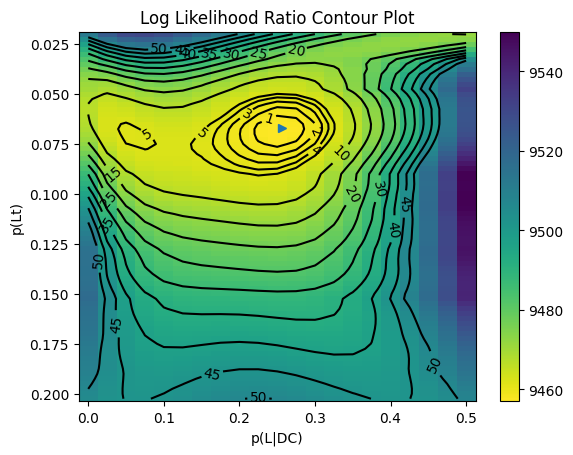

Maximum Log-Likelihood: -9456.974139264772
Coordinates of Maximum Likelihood: pldc =0.255890161482723, pl=0.06695524230825872


perfect fit score: -9360.350771275835

chi square: 193.24673597787478


In [44]:
table2 = np.array([
 
    [6917, 308,   411,   53,    18,    7],  # Chamberlain 1928
    [1842, 151,   140,   34,    5,     6],  # Rife 1940
    [6206, 669,   471,   125,   5,     1],  # Annett 1973
    [154,  11,    31,    9,     0,     0],  # Ferronato et al. 1947
    [232,  17,    41,    7,     3,     1],  # Mascie-Taylor (unpub, in McManus 1985)
    [1060, 144,   122,   46,    3,     4],  # Chaurasia & Groswani (unpub, in McManus 1985)
    [1656, 130,   170,   40,    4,     0],  # Annett 1978
    [303,  37,    45,    15,    0,     0],  # Carter-Saltzmann 1980
    [315,  68,    57,    16,    0,     0],   # Coren & Porac 1980
])


table3 = np.array([
[  58,   9,  np.nan,  np.nan,  np.nan,  np.nan,  14,   5,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,  np.nan,  np.nan,  np.nan,  np.nan],
[  211,  57, 3,       np.nan,  np.nan,  np.nan,  35,  16,   5,       np.nan,  np.nan,  np.nan,   0, 0,   1,      np.nan,  np.nan,  np.nan],
[  123,  63, 6,       0,       np.nan,  np.nan,  22,  24,   6,       1,       np.nan,  np.nan,   2, 1,   1,      0,       np.nan,  np.nan],
[  70,   39, 6,       1,       0,       np.nan,   8,   8,   7,       1,       0,       np.nan,   0, 0,   1,      0,       0,       np.nan],
[  9,    12, 6,       2,       0,       0,        1,   0,   0,       1,       0,       0,        1, 0,   0,      0,       0,            0],
[  134,  15, np.nan,  np.nan,  np.nan,  np.nan,  17,   9,   np.nan,  np.nan,  np.nan,  np.nan,   1, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  91,   22, 2,       np.nan,  np.nan,  np.nan,  19,   3,   3,       np.nan,  np.nan,  np.nan,   0, 0,   0,      np.nan,  np.nan,  np.nan],
[  22,   7,  0,       2,       np.nan,  np.nan,   6,  11,   3,       0,       np.nan,  np.nan,   0, 0,   0,      0,       np.nan,  np.nan],
[  10,   5,  0,       0,       0,       np.nan,   3,   1,   0,       0,       0,       np.nan,   1, 0,   0,      0,       0,       np.nan],
[  4,    0,  0,       0,       0,       0,        0,   0,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0],
[  74,   4,  np.nan,  np.nan,  np.nan,  np.nan,   6,   2,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  107,  18, 3,       np.nan,  np.nan,  np.nan,  11,   3,   0,       np.nan,  np.nan,  np.nan,   2, 0,   0,      np.nan,  np.nan,  np.nan],
[  81,   16, 4,       0,       np.nan,  np.nan,  16,   1,   0,       2,       np.nan,  np.nan,   0, 0,   0,      0,       np.nan,  np.nan],
[  31,   10, 1,       0,       0,       np.nan,   0,   0,   0,       2,       0,       np.nan,   0, 0,   0,      0,       0,       np.nan],
[  19,   7,  1,       1,       0,       0,        3,   2,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0],
[  86,   4,  np.nan,  np.nan,  np.nan,  np.nan,   8,   1,   np.nan,  np.nan,  np.nan,  np.nan,   0, 0,   np.nan, np.nan,  np.nan,  np.nan],
[  100,  27, 0,       np.nan,  np.nan,  np.nan,   7,   5,   0,       np.nan,  np.nan,  np.nan,   0, 1,   0,      np.nan,  np.nan,  np.nan],
[  65,  11,  2,       0,       np.nan,  np.nan,   4,   3,   2,       0,       np.nan,  np.nan,   0, 1,   0,      0,       np.nan,  np.nan],
[  39,  11,  2,       0,       0,       np.nan,   2,   1,   0,       0,       0,       np.nan,   0, 0,   0,      0,       0,       np.nan],
[  13,   9,  1,       0,       0,       0,        0,   1,   0,       0,       0,       0,        0, 0,   0,      0,       0,            0]
]) 

table5_mono = np.array([
    [56,  13,   1], # Wilson & Jones (1932)
    [35,  6,    1], # Stocks (1933)
    [34,  13,   3], # Newman et al. (1937)
    [80,  38,   4], # Bouterwek (1938)
    [176, 41,   6], # Rife (1940)
    [72,  24,   7], # Thyss (1946)
    [261, 76,   6], # Rife (1950)
    [19,  12,   2], # Dechaume (1957)
    [199, 51,   9], # Zazzo (1960)
    [132, 46,   9], # Carter-Saltzmann et al. (1976)
    # [380, 123, 11], # Loehlin & Nichols (1976)
    [53,  19,   3], # Springer & Searleman (1978)
    [32,   9,   2]  # NCDS (unpublished)
])
table5_di = np.array([
    [97,  24,   2], # Wilson & Jones (1932)
    [76,  16,   2], # Stocks (1933)
    [39,  11,   0], # Newman et al. (1937)
    [23,  12,   0], # Bouterwek (1938)
    [104, 39,   3], # Rife (1940)
    [60,  24,   2], # Thyss (1946)
    [164, 45,   2], # Rife (1950)
    [21,  11,   1], # Dechaume (1957)
    [264, 69,   2], # Zazzo (1960)
    [115, 54,   7], # Carter-Saltzmann et al. (1976)
    # [261, 70,   2], # Loehlin & Nichols (1976)
    [35,  9,    3], # Springer & Searleman (1978)
    [66,  18,   4]  # NCDS (unpublished)
])

print("Model D")
tables = [table2, table3, table5_mono, table5_di]
type_list = [1,1,2,3]
rows_in_dataset_list = [1,5,1,1]

max_likelihood=run_model(tables, type_list, rows_in_dataset_list)


In [45]:
chi2.sf(13.952,164)

1.0

In [46]:
# chi2

table2_mes = np.array([calc_measured_fam([row]) for row in table2])
table3_mes = np.array([calc_measured_fam(table3[i*5:5*(1+i)]) for i in range(4)])
table5_mono_mes = np.array([calc_measured_twin(row) for row in table5_mono])
table5_di_mes =  np.array([calc_measured_twin(row) for row in table5_di])
measured_tables = [table2_mes, table3_mes, table5_mono_mes, table5_di_mes]

table2_exp, table2_exp_prob = calc_exp_table(table2, table2_mes, pl, pldc, 1, 1)
table3_exp, table3_exp_prob = calc_exp_table(table3, table3_mes, pl, pldc, 5, 1)
table5_mono_exp, table5_mono_exp_prob = calc_exp_table(table5_mono, table5_mono_mes, pl, pldc, 1, 2)
table5_di_exp, table5_di_exp_prob = calc_exp_table(table5_di, table5_di_mes, pl, pldc, 1, 3)

table2_prob = calc_empirical_probs(table2, 2)
table3_prob = calc_empirical_probs(table3, 6)
table5_mono_prob = calc_empirical_probs(table5_mono, 3)
table5_di_prob = calc_empirical_probs(table5_di, 3)

table2_perfit = np.array([log_like(table2[i],table2_prob[i]) for i in range(len(table2))])
table3_perfit = np.array([log_like(table3[5*i:5*(i+1)],table3_prob[5*i:5*(i+1)]) for i in range(4)])
table5_mono_perfit = np.array([log_like(table5_mono[i],table5_mono_prob[i]) for i in range(len(table5_mono))])
table5_di_perfit = np.array([log_like(table5_di[i],table5_di_prob[i]) for i in range(len(table5_di))])

table2_chi = -2 * (np.array([log_like(table2[i],table2_exp_prob[i]) for i in range(len(table2))]) - table2_perfit)
table2_pval = chi2.sf(table2_chi, df =1)

table3_chi = -2 * (np.array([log_like(table3[5*i:5*(i+1)],table3_exp_prob[5*i:5*(i+1)]) for i in range(4)]) - table3_perfit)



table5_mono_chi = -2 * (np.array([log_like(table5_mono[i],table5_mono_exp_prob[i]) for i in range(len(table5_mono))]) - table5_mono_perfit)

table5_di_chi = -2 * (np.array([log_like(table5_di[i],table5_di_exp_prob[i]) for i in range(len(table5_di))]) - table5_di_perfit)


print(f'Table 2:overall table chi score = {np.sum(table2_chi)}, p-value = {chi2.sf(np.sum(table2_chi), df = 9)}')
print(f'Table 3: overall table chi score = {np.sum(table3_chi)}, p-value = {chi2.sf(np.sum(table3_chi), df =133)}')
print(f'Table 5:overall table chi score = {np.sum(table5_mono_chi)+np.sum(table5_di_chi)}, p-value = {chi2.sf(np.sum(table5_mono_chi)+np.sum(table5_di_chi), df =24)}')
print(f'Table 5 MZ:overall table chi score = {np.sum(table5_mono_chi)}, p-value = {chi2.sf(np.sum(table5_mono_chi), df =12)}')
print(f'Table 5 DZ:overall table chi score = {np.sum(table5_di_chi)}, p-value = {chi2.sf(np.sum(table5_di_chi), df =12)}')


Table 2:overall table chi score = 14.449360501419122, p-value = 0.1072144526622064
Table 3: overall table chi score = 153.7424105558248, p-value = 0.10537627602841498
Table 5:overall table chi score = 25.7597539642041, p-value = 0.3654667616850816
Table 5 MZ:overall table chi score = 7.779685760377205, p-value = 0.8021015135137296
Table 5 DZ:overall table chi score = 17.980068203826896, p-value = 0.11629706038987773


Maximum Log-Likelihood: -9456.974139264772
Coordinates of Maximum Likelihood: pldc =0.255890161482723, pl=0.06695524230825872


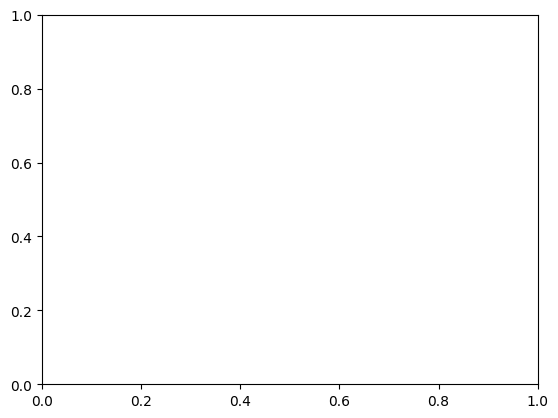

In [47]:
PL,PLDC, vals, max_cord, max_likelihood = make_grid(tables, type_list, rows_in_dataset_list)
ratio= max_likelihood-vals #(vals-abs(max_likelihood))
ax = axes[2]

L_DC = np.arange(0, 0.525, 0.025)
L_T = np.arange(0.02, 0.2025, 0.0025)
im = ax.pcolormesh(L_DC, L_T, vals.T, cmap='magma' )
cs = ax.contour(L_DC, L_T, ratio.T, colors='k', levels = [1,2,3,4,5,10,15,20,25,30,35,40,45,50])
plt.clabel(cs)
ax.invert_yaxis()

# Add a colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('p(L|DC)')
ax.set_ylabel('p(Lt)')
# ax.set_title('Log Likelihood Ratio Contour Plot, Model D')
ax.plot(*(0.2712, 0.0737), "-p", label="A" ) #our  A Apoint
ax.plot(*(0.2328, 0.0645), "-p", label ="B") #our  B Apoint
ax.plot(*(0.25, 0.0775), "-p", label="C" ) # our  C Apoint
ax.plot(*(0.252, 0.069), "-p", label ="D") # our  D Apoint
ax.plot(*(0.25, 0.0725), "-p", label="C'" ) # our  C Apoint
ax.set_title("reduced dataset (model D)")
ax.legend()

print(f"Maximum Log-Likelihood: {max_likelihood}")
print(f"Coordinates of Maximum Likelihood: pldc ={max_cord[0]}, pl={max_cord[1]}")

## comparing all the points on one graph

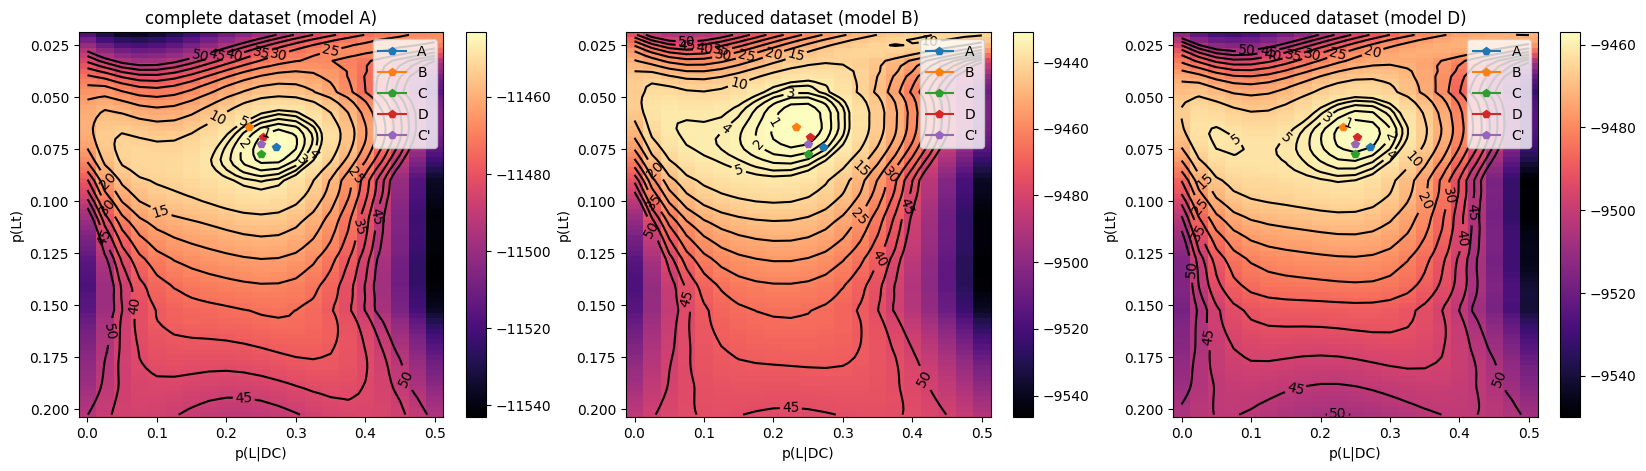

In [48]:
comp

In [49]:

PL,PLDC, vals, max_cord, max_likelihood = make_grid(tables, type_list, rows_in_dataset_list)
ratio= max_likelihood-vals #(vals-abs(max_likelihood))
ax = fig.add_subplot()

L_DC = np.arange(0, 0.525, 0.025)
L_T = np.arange(0.02, 0.2025, 0.0025)
im = ax.pcolormesh(L_DC, L_T, -vals.T, cmap='magma' )
cs = ax.contour(L_DC, L_T, ratio.T, colors='k', levels = [1,2,3,4,5,10,15,20,25,30,35,40,45,50])
plt.clabel(cs)
ax.invert_yaxis()

# Add a colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('p(L|DC)')
ax.set_ylabel('p(Lt)')
# ax.set_title('Log Likelihood Ratio Contour Plot, Model D')
ax.plot(*(0.2712, 0.0737), "-p", label="A" ) #our  A Apoint
ax.plot(*(0.2328, 0.0645), "-p", label ="B") #our  B Apoint
ax.plot(*(0.25, 0.0775), "-p", label="C" ) # our  C Apoint
ax.plot(*(0.252, 0.069), "-p", label ="D") # our  D Apoint
ax.set_title("reduced dataset")
ax.legend()

plt.show()
print(f"Maximum Log-Likelihood: {max_likelihood}")
print(f"Coordinates of Maximum Likelihood: pldc ={max_cord[0]}, pl={max_cord[1]}")

AttributeError: 'Figure' object has no attribute 'add_subplot'

## The expected distributions of left handers, given model

In [ ]:
#params:
pldc = 0.25
pl = 0.0725
c = calc_c(pl,pldc)
print(f"C={c}")

C=0.145


family:

In [ ]:
pl = 0.0725
c = calc_c(pl,pldc)
for size in range(1,6):
    print(f"family size = {size}")
    display(pd.DataFrame(np.around(family_probs(c,pl,pldc,size).reshape(3,-1),5)*100,  index =["RR","RL","LL"]))

family size = 1


,0,1
RR,94.421,5.579
RL,82.898,17.102
LL,71.375,28.625


family size = 2


,0,1,2
RR,89.766,9.311,0.924
RL,69.221,27.355,3.425
LL,51.331,40.087,8.581


family size = 3


,0,1,2,3
RR,85.856,11.728,2.238,0.178
RL,58.165,33.166,7.865,0.803
LL,37.156,42.525,17.606,2.713


family size = 4


,0,1,2,3,4
RR,82.555,13.206,3.648,0.551,0.040
RL,49.144,36.086,12.203,2.352,0.215
LL,27.045,40.446,24.381,7.221,0.907


family size = 5


,0,1,2,3,4,5
RR,79.753,14.008,4.999,1.081,0.149,0.010
RL,41.719,37.123,15.969,4.369,0.756,0.064
LL,19.778,36.335,28.445,12.190,2.932,0.321


DZ twins:

In [ ]:
pd.DataFrame(np.around([
[twins_phen_parental_phen(c,pldc,pl,0,0,0,0,2), 2* twins_phen_parental_phen(c,pldc,pl,0,1,0,0,2),twins_phen_parental_phen(c,pldc,pl,1,1,0,0,2)],
[twins_phen_parental_phen(c,pldc,pl,0,0,0,1,2), 2* twins_phen_parental_phen(c,pldc,pl,0,1,0,1,2),twins_phen_parental_phen(c,pldc,pl,1,1,0,1,2)],
[twins_phen_parental_phen(c,pldc,pl,0,0,1,1,2), 2* twins_phen_parental_phen(c,pldc,pl,0,1,1,1,2),twins_phen_parental_phen(c,pldc,pl,1,1,1,1,2)],
twins_prob(c,pldc,pl,2)
],5), index =["RR","RL","LL", "NK"], columns=["RR","RL","LL"])*100


,RR,RL,LL
RR,89.766,9.311,0.924
RL,69.221,27.355,3.425
LL,51.331,40.087,8.581
NK,86.800,11.899,1.300


MZ twins

In [ ]:
pd.DataFrame(np.around([
[twins_phen_parental_phen(c,pldc,pl,0,0,0,0,1), 2* twins_phen_parental_phen(c,pldc,pl,0,1,0,0,1),twins_phen_parental_phen(c,pldc,pl,1,1,0,0,1)],
[twins_phen_parental_phen(c,pldc,pl,0,0,0,1,1), 2* twins_phen_parental_phen(c,pldc,pl,0,1,0,1,1),twins_phen_parental_phen(c,pldc,pl,1,1,0,1,1)],
[twins_phen_parental_phen(c,pldc,pl,0,0,1,1,1), 2* twins_phen_parental_phen(c,pldc,pl,0,1,1,1,1),twins_phen_parental_phen(c,pldc,pl,1,1,1,1,1)],
twins_prob(c,pldc,pl,1) 
],5), index =["RR","RL","LL", "NK"], columns=["RR","RL","LL"])*100

,RR,RL,LL
RR,90.392,8.057,1.550
RL,70.870,24.056,5.074
LL,54.003,34.744,11.253
NK,87.575,10.349,2.075


In [ ]:
chi2.sf(242.794, 169)

0.00017211805272200717